# Points of incidence and risk associated with traffic accidents

<a id='toc'></a>
# Table of Contents
* [1. Import Libraries and Data](#import) <br>
    * [1.1. Libraries](#libs) <br>
    * [1.2. Source Data](#data) <br>
* [2. Data Transformation](#transformation) <br>
    * [2.1. Set Index](#set-index) <br>
    * [2.2. Check Duplicates](#check-dups) <br>
    * [2.3. Missing Values](#missing-values) <br>
    * [2.4. Feature Engineering](#feat-engi) <br>
* [3. Exploratory Analysis](#exp-analysis) <br>
    * [3.1. Numerical Variables](#num-vars) <br>
    * [3.2. Categorical Variables](#cat-vars) <br>
    * [3.3. In-depth Exploration](#in-depth_analysis) <br>
* [4. Visual Exploration](#visual-exploration) <br>
    * [4.1. Lisbon Parishes](#parishes) <br>
    * [4.2. Traffic Accidents](#accidents) <br>
    * [4.3. Lisbon Parishes, Traffic accidents and Roads](#fullmap) <br>
    * [4.4. Number of accidents per Parish](#accidents-parish) <br>
    * [4.5. Number of accidents per day](#accidents-per-day) <br>
    * [4.6. Accident type by Parish](#accidents-type-parish) <br>
* [5. Identifying external factors' impact on accidents](#external-factors) <br>
    * [5.1. Set up the dataset](#setup-dataset) <br>
    * [5.2. Statistical Analysis](#stat-analysis) <br>
    * [5.3. Data Scaling](#scaling) <br>
    * [5.4. Modeling](#modeling) <br>
    * [5.5. Model results](#model-results) <br>
    * [5.6. Visual representation](#visual-results) <br>
* [6. Annexes](#annex) <br>
    * [6.1. Identify the principal characteristics that influence the type of accident](#type-accident) <br>

<a id='import'></a>
# 1. Import Libraries and Data

<a id='libs'></a>
## 1.1 Libraries

In [111]:
import os
import datetime
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import statsmodels.api as sm
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

### 1.1.1 Check if the charts' folder exists

In [112]:
if not os.path.exists('charts'):
    os.makedirs('charts')

<a id='data'></a>
## 1.2. Source Data

## 1.2.1. Traffic Accidents

In [113]:
dfANSR = pd.read_excel(os.path.join("data", "ANSR", "Acidentes_ANSR_2019_desafio_lxdatalab_2020_21.xlsx"), sheet_name="acidentes")
vehic = pd.read_excel(os.path.join("data", "ANSR", "Acidentes_ANSR_2019_desafio_lxdatalab_2020_21.xlsx"), sheet_name="veíc-cond")
passg = pd.read_excel(os.path.join("data", "ANSR", "Acidentes_ANSR_2019_desafio_lxdatalab_2020_21.xlsx"), sheet_name="passageiros")
pawns = pd.read_excel(os.path.join("data", "ANSR", "Acidentes_ANSR_2019_desafio_lxdatalab_2020_21.xlsx"), sheet_name="peões")

### 1.2.2. Parish data

In [114]:
dfParish = pd.read_excel(os.path.join("data", "INE", "Dados_Freguesias.xlsx"), sheet_name="Quadro")
dfParish.head(3)

Freguesia  \
0         Ajuda   
1     Alcântara   
2  Alto do Pina   

   Densidade populacional (N.º/ km²) por Local de residência (à data dos Censos 2011) e Sexo; Decenal  \
0                                             5456.9                                                    
1                                             3142.0                                                    
2                                            12319.6                                                    

   População activa (N.º) por Local de residência (à data dos Censos 2011), Sexo, Grupo etário e Estado civil; Decenal  \
0                                               6529                                                                     
1                                               6311                                                                     
2                                               5082                                                                     

   Indivíduos activos com 15 e mais anos de idade (N.º) nas famílias clássicas por Local de residência (à data dos Censos 2011), Sexo e Tipo de família clássica (Com base na estrutura etária); Decenal  \
0                                               6529                                                                                                                                                       
1                                               6297                                                                                                                                                       
2                                               5081                                                                                                                                                       

   Indivíduos desempregados (N.º) nas famílias clássicas por Local de residência (à data dos Censos 2011), Condição perante o trabalho (indivíduo desempregado na família clássica) e Tipo de família clássica (Com base na estrutura etária); Decenal  \
0                                               1017                                                                                                                                                                                                     
1                                                711                                                                                                                                                                                                     
2                                                544                                                                                                                                                                                                     

   Taxa de desemprego (%)  \
0                   15.58   
1                   11.39   
2                   10.70   

   Meio de transporte mais utilizado nos movimentos pendulares (N.º) por Local de residência (à data dos Censos 2011) e Principal meio de transporte - Automovel ligeiro - como condutor  \
0                                               2515                                                                                                                                       
1                                               2291                                                                                                                                       
2                                               2016                                                                                                                                       

   Meio de transporte mais utilizado nos movimentos pendulares (N.º) por Local de residência (à data dos Censos 2011) e Principal meio de transporte - Automovel ligeiro - como passageiro  \
0                                                908                                                                                         

### 1.2.3. Parish Translation table
Translation between parishes in 2011 and 2013 onwards

In [115]:
parishTranslation = pd.read_excel(os.path.join("data", "INE", "Trad_Freg_Antigas_vs_Atuais.xlsx"))
parishTranslation

Freguesias atuais  População atuais Área\n(km²) atuais  \
0                      Ajuda (Ocidental)             15617               2,88   
1                  Alcântara (Ocidental)             13943               5,07   
2                      Alvalade (Centro)             31813               5,34   
3                      Alvalade (Centro)             31813               5,34   
4                      Alvalade (Centro)             31813               5,34   
5                       Areeiro (Centro)             20131               1,74   
6                       Areeiro (Centro)             20131               1,74   
7                       Arroios (Centro)             31653               2,13   
8                       Arroios (Centro)             31653               2,13   
9                       Arroios (Centro)             31653               2,13   
10               Avenidas Novas (Centro)             21625               2,99   
11               Avenidas Novas (Centro)             21625               2,99   
12                      Beato (Oriental)             12737               2,46   
13                     Belém (Ocidental)             16528              10,43   
14                     Belém (Ocidental)             16528              10,43   
15                       Benfica (Norte)             36985               8,03   
16   Campo de Ourique (Centro Historico)             22120               1,65   
17   Campo de Ourique (Centro Historico)             22120               1,65   
18                    Campolide (Centro)             15460               2,77   
19                       Carnide (Norte)             19218               3,69   
20            Estrela (Centro Histórico)             20128               4,60   
21            Estrela (Centro Histórico)             20128               4,60   
22            Estrela (Centro Histórico)             20128               4,60   
23                        Lumiar (Norte)             45605               6,57   
24                    Marvila (Oriental)             37793               7,12   
25       Misericórdia (Centro Histórico)             13044               2,19   
26       Misericórdia (Centro Histórico)             13044               2,19   
27       Misericórdia (Centro Histórico)             13044               2,19   
28       Misericórdia (Centro Histórico)             13044               2,19   
29                    Olivais (Oriental)             33788               8,09   
30          Parque das Nações (Oriental)             21025               5,44   
31    Penha de França (Centro Histórico)             27967               2,71   
32    Penha de França (Centro Histórico)             27967               2,71   
33                   Santa Clara (Norte)             22480               3,36   
34                   Santa Clara (Norte)             22480               3,36   
35  Santa Maria Maior (Centro Histórico)             12822               3,01   
36  Santa Maria Maior (Centro Histórico)             12822               3,01   
37  Santa Maria Maior (Centro Histórico)             12822               3,01   
38  Santa Maria Maior (Centro Histórico)             12822               3,01   
39  Santa Maria Maior (Centro Histórico)             12822               3,01   
40  Santa Maria Maior (Centro Histórico)             12822               3,01   
41  Santa Maria Maior (Centro Histórico)             12822               3,01   
42  Santa Maria Maior (Centro Histórico)             12822               3,01   
43  Santa Maria Maior (Centro Histórico)             12822               3,01   
44  Santa Maria Maior (Centro Histórico)             12822               3,01   
45  Santa Maria Maior (Centro Histórico)             12822               3,01   
46  Santa Maria Maior (Centro Histórico)             12822               3,01   
47                Santo António (Centro)             11836               1,49   
48                Santo António (Centro)             1

### 1.2.4. Parish House Prices 2019

In [116]:
parishHousePrice = pd.read_excel(os.path.join("data", "INE", "Destaque_HAB_4T2019_PT.xlsx"), sheet_name="CID_Lisboa_Freguesias", header=2)
parishHousePrice.drop(columns=['Unnamed: 0','4ºT 2019.1','Unnamed: 4'], inplace=True)
parishHousePrice.rename(columns={'Unnamed: 1': 'Freguesia', '4ºT 2019':'Avg_Price_Sqr_Mt'}, inplace=True)
parishHousePrice = parishHousePrice[parishHousePrice['Freguesia'] != 'Lisboa'].copy().reset_index(drop=True)
parishHousePrice['Avg_Price_Sqr_Mt'] = parishHousePrice['Avg_Price_Sqr_Mt'].astype(int)
parishHousePrice

Freguesia  Avg_Price_Sqr_Mt
0                     Ajuda              3205
1                 Alcântara              3127
2                     Beato              2385
3                   Benfica              2717
4                 Campolide              3032
5                   Carnide              2884
6                    Lumiar              2674
7                   Marvila              2804
8                   Olivais              2430
9   São Domingos de Benfica              3333
10                 Alvalade              3547
11                  Areeiro              3167
12                  Arroios              3274
13           Avenidas Novas              3892
14                    Belém              3542
15         Campo de Ourique              3846
16                  Estrela              3846
17             Misericórdia              4813
18        Parque das Nações              4132
19          Penha de França              2936
20              Santa Clara              2354
21        Santa Maria Maior              4483
22            Santo António              4932
23              São Vicente              3402

### 1.2.5. Lisbon parishes

<AxesSubplot:>

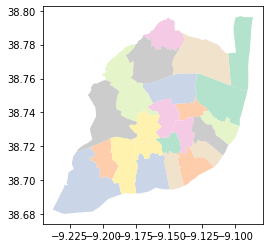

In [117]:
gpdMunLisbon=gpd.read_file(os.path.join("data", "Lisboa", "Limites_Cartografia.shp"))
gpdMunLisbon.plot(cmap='Pastel2')

### 1.2.6. Traffic Lights

<AxesSubplot:>

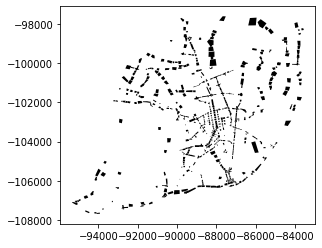

In [118]:
gpdLights = gpd.read_file(os.path.join("data", "Semáforos", "Localização_semaforos.shp"))
gpdLights.plot(color='black')

### 1.2.7. Crossroads

<AxesSubplot:>

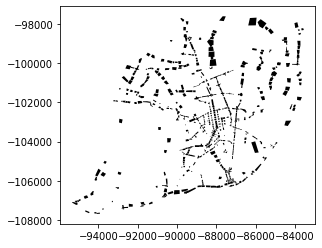

In [119]:
gpdCross = gpd.read_file(os.path.join("data", "Cruzamentos", "Cruzamentos_SLAT.shp"))
gpdCross.plot(color='black')

### 1.2.8. Slopes

<AxesSubplot:>

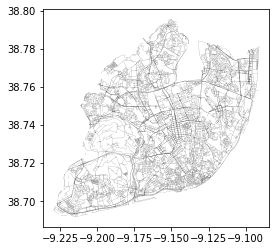

In [120]:
gpdSlopes = gpd.read_file(os.path.join("data", "Declives", "Mob_declives.shp"))
gpdSlopes.plot(linewidth=0.1,color='black',facecolor='white')

### 1.2.9. Altimetry

<AxesSubplot:>

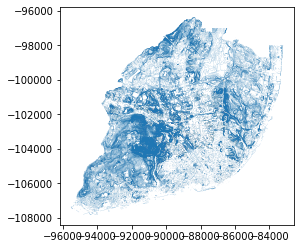

In [121]:
gpdAlti = gpd.read_file(os.path.join("data", "Altimetria", "ALTIMETRIA.shp"))
gpdAlti.plot(linewidth=0.1)

### 1.2.10. Metro Stations

<AxesSubplot:>

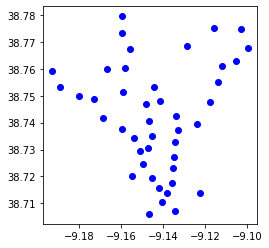

In [122]:
gpdMetroStations = gpd.read_file(os.path.join("data", "Metro", "POITransportes.shp"))
gpdMetroStations.plot(color='blue')

[BACK TO TOC](#toc)
<a id='transformation'></a>
# 2. Data Transformation

<a id='set-index'></a>
## 2.1. Set Index

In [123]:
dfANSR.set_index('IdAcidente',inplace=True)
vehic.set_index('IdAcidente',inplace=True)
pawns.set_index('IdAcidente',inplace=True)
passg.set_index('IdAcidente',inplace=True)

<a id='check-dups'></a>
## 2.2. Check Duplicates

In [124]:
dfANSR[dfANSR.duplicated()]

Empty DataFrame
Columns: [Datahora, Dia da Semana, Sentidos, Latitude GPS, Longitude GPS, Via Trânsito, Localizações, Freguesia, Pov. Proxima, Tipo Natureza, Natureza, Traçado 1, Traçado 2, Traçado 3, Traçado 4, Estado Conservação, Características Tecnicas, Reg Circulação, Marca Via, Obstáculos, Sinais, Sinais Luminosos, Tipo Piso, Intersecção Vias, Factores Atmosféricos, Luminosidade, Cond Aderência, VM, FG, FL, Tipos Vias, Via, Num arruamento, Km, Nome arruamento, Localização 2]
Index: []

[0 rows x 36 columns]

Since there are no duplicates, no action will be performed.

<a id='missing-values'></a>
## 2.3. Missing values

In [125]:
dfANSR.isna().sum()[dfANSR.isna().sum()>0]

Latitude GPS        945
Longitude GPS       945
Pov. Proxima       1322
Num arruamento      259
Km                 2519
Nome arruamento     253
dtype: int64

## 2.3.1. Drop missing coordinates

In [126]:
missing = dfANSR[dfANSR['Latitude GPS'].isnull() | dfANSR['Longitude GPS'].isnull()]
dfAcidentesGPS = dfANSR.drop(missing.index)
dfAcidentesGPS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1823 entries, 20191648491 to 20201866679
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Datahora                  1823 non-null   object 
 1   Dia da Semana             1823 non-null   object 
 2   Sentidos                  1823 non-null   object 
 3   Latitude GPS              1823 non-null   float64
 4   Longitude GPS             1823 non-null   float64
 5   Via Trânsito              1823 non-null   object 
 6   Localizações              1823 non-null   object 
 7   Freguesia                 1823 non-null   object 
 8   Pov. Proxima              1030 non-null   object 
 9   Tipo Natureza             1823 non-null   object 
 10  Natureza                  1823 non-null   object 
 11  Traçado 1                 1823 non-null   object 
 12  Traçado 2                 1823 non-null   object 
 13  Traçado 3                 1823 non-null   obje

<a id='feat-engi'></a>
## 2.4. Feature Engineering

### 2.4.1 Number of vehicles involved in each accident

In [127]:
#Create column with the number of vehicles per accident
n_vehic = vehic.index.value_counts().rename('n_vehic')

#Join with the traffic accidents dataframe (dfANSR)
df_aux = dfANSR.join(n_vehic, how='left')
df_aux

Datahora  Dia da Semana  \
IdAcidente                                        
20191648491  2019:01:02 15:10:00  Quarta-Feira    
20191648498  2019:01:02 16:45:00  Quarta-Feira    
20191648520  2019:01:02 13:05:00  Quarta-Feira    
20191649633  2019:01:03 09:20:00  Quinta-Feira    
20191649654  2019:01:03 18:15:00  Quinta-Feira    
...                          ...            ...   
20201827869  2019:12:12 19:00:00  Quinta-Feira    
20201828362  2019:12:29 23:20:00  Domingo         
20201831029  2019:12:19 12:30:00  Quinta-Feira    
20201838659  2019:01:14 09:30:00  Segunda-Feira   
20201866679  2019:12:28 03:20:00  Sábado          

                                          Sentidos  Latitude GPS  \
IdAcidente                                                         
20191648491                           NÃO DEFINIDO     38.768367   
20191648498                           NÃO DEFINIDO     38.719096   
20191648520                           NÃO DEFINIDO     38.728779   
20191649633                           NÃO DEFINIDO     38.793481   
20191649654                           NÃO DEFINIDO           NaN   
...                                            ...           ...   
20201827869                           NÃO DEFINIDO     38.744884   
20201828362  No sentido crescente da quilometragem     38.723980   
20201831029                           NÃO DEFINIDO     38.773151   
20201838659                           NÃO DEFINIDO     38.737556   
20201866679                           NÃO DEFINIDO     38.722471   

             Longitude GPS Via Trânsito            Localizações  \
IdAcidente                                                        
20191648491      -9.172899      Direita  Dentro das localidades   
20191648498      -9.156130     Esquerda  Dentro das localidades   
20191648520      -9.147518      Central  Dentro das localidades   
20191649633      -9.151816      Direita  Dentro das localidades   
20191649654            NaN      Direita  Dentro das localidades   
...                    ...          ...                     ...   
20201827869      -9.190044      Direita  Dentro das localidades   
20201828362      -9.178698      Central    Fora das localidades   
20201831029      -9.104003      Direita  Dentro das localidades   
20201838659      -9.124215      Direita  Dentro das localidades   
20201866679      -9.135470      Direita  Dentro das localidades   

                           Freguesia Pov. Proxima  Tipo Natureza  ... VM FG  \
IdAcidente                                                        ...         
20191648491                   Lumiar       Lisboa  Atropelamento  ...  0  0   
20191648498         Campo de Ourique       Lisboa  Atropelamento  ...  0  0   
20191648520           Avenidas Novas       Lisboa        Colisão  ...  0  0   
20191649633              Santa Clara          NaN  Atropelamento  ...  0  0   
20191649654            Santo António          NaN        Colisão  ...  0  0   
...                              ...          ...            ...  ... .. ..   
20201827869  São Domingos de Benfica          NaN  Atropelamento  ...  0  0   
20201828362                Alcântara    ALCANTARA        Colisão  ...  0  0   
20201831029        Parque das Nações       Lisboa        Colisão  ...  0  0   
20201838659                    Beato          NaN  Atropelamento  ...  0  1   
20201866679                  Arroios       Lisboa        Colisão  ...  0  0   

            FL         Tipos Vias Via Num arruamento    Km  \
IdAcidente                                                   
20191648491  1         Arruamento   0              0   NaN   
20191648498  3         Arruamento   0              9   NaN   
20191648520  1         Arruamento   0             16   NaN   
20191649633  1         Arruamento   0              2   NaN   
20191649654  1         Arruamento   0              0   NaN   
...         ..                ...  ..            ...   ...   
20201827869  2         Arruamento   0             10   NaN   
20201828362  1  A

### 2.4.2 Number of pawns involved in each accident

In [128]:
#Create column with the number of pawns per accident
n_pawns = pawns.index.value_counts().rename('n_pawns')

#Join with the previous dataframe (df_aux)
df_aux_2 = df_aux.join(n_pawns, how='left')

### 2.4.3. Number of passengers involved in each accident

In [129]:
#Criação da coluna com número de peões
n_passg = passg.index.value_counts().rename('n_passg')

#Join com o df
dfAccidents = df_aux_2.join(n_passg,how='left')

### 2.4.4. Replace NaN by zero in columns n_vehic, n_pawns, n_passg

In [130]:
dfAccidents.fillna({
    'n_vehic': 0,
    'n_pawns': 0,
    'n_passg': 0
    }, inplace = True)

### 2.4.5. Total number of people involved in each accident

In [131]:
dfAccidents['people'] = 1 + dfAccidents['n_passg'] + dfAccidents['n_pawns']
dfAccidents

Datahora  Dia da Semana  \
IdAcidente                                        
20191648491  2019:01:02 15:10:00  Quarta-Feira    
20191648498  2019:01:02 16:45:00  Quarta-Feira    
20191648520  2019:01:02 13:05:00  Quarta-Feira    
20191649633  2019:01:03 09:20:00  Quinta-Feira    
20191649654  2019:01:03 18:15:00  Quinta-Feira    
...                          ...            ...   
20201827869  2019:12:12 19:00:00  Quinta-Feira    
20201828362  2019:12:29 23:20:00  Domingo         
20201831029  2019:12:19 12:30:00  Quinta-Feira    
20201838659  2019:01:14 09:30:00  Segunda-Feira   
20201866679  2019:12:28 03:20:00  Sábado          

                                          Sentidos  Latitude GPS  \
IdAcidente                                                         
20191648491                           NÃO DEFINIDO     38.768367   
20191648498                           NÃO DEFINIDO     38.719096   
20191648520                           NÃO DEFINIDO     38.728779   
20191649633                           NÃO DEFINIDO     38.793481   
20191649654                           NÃO DEFINIDO           NaN   
...                                            ...           ...   
20201827869                           NÃO DEFINIDO     38.744884   
20201828362  No sentido crescente da quilometragem     38.723980   
20201831029                           NÃO DEFINIDO     38.773151   
20201838659                           NÃO DEFINIDO     38.737556   
20201866679                           NÃO DEFINIDO     38.722471   

             Longitude GPS Via Trânsito            Localizações  \
IdAcidente                                                        
20191648491      -9.172899      Direita  Dentro das localidades   
20191648498      -9.156130     Esquerda  Dentro das localidades   
20191648520      -9.147518      Central  Dentro das localidades   
20191649633      -9.151816      Direita  Dentro das localidades   
20191649654            NaN      Direita  Dentro das localidades   
...                    ...          ...                     ...   
20201827869      -9.190044      Direita  Dentro das localidades   
20201828362      -9.178698      Central    Fora das localidades   
20201831029      -9.104003      Direita  Dentro das localidades   
20201838659      -9.124215      Direita  Dentro das localidades   
20201866679      -9.135470      Direita  Dentro das localidades   

                           Freguesia Pov. Proxima  Tipo Natureza  ...  \
IdAcidente                                                        ...   
20191648491                   Lumiar       Lisboa  Atropelamento  ...   
20191648498         Campo de Ourique       Lisboa  Atropelamento  ...   
20191648520           Avenidas Novas       Lisboa        Colisão  ...   
20191649633              Santa Clara          NaN  Atropelamento  ...   
20191649654            Santo António          NaN        Colisão  ...   
...                              ...          ...            ...  ...   
20201827869  São Domingos de Benfica          NaN  Atropelamento  ...   
20201828362                Alcântara    ALCANTARA        Colisão  ...   
20201831029        Parque das Nações       Lisboa        Colisão  ...   
20201838659                    Beato          NaN  Atropelamento  ...   
20201866679                  Arroios       Lisboa        Colisão  ...   

                    Tipos Vias Via Num arruamento    Km  \
IdAcidente                                                
20191648491         Arruamento   0              0   NaN   
20191648498         Arruamento   0              9   NaN   
20191648520         Arruamento   0             16   NaN   
20191649633         Arruamento   0              2   NaN   
20191649654         Arruamento   0              0   NaN   
...                        ...  ..            ...   ...   
20201827869         Arruamento   0             10   NaN   
20201828362  A  - Auto-Estrada  A5            NaN  0.17   
20201831029         Arruamento   0              0   NaN   
2020

### 2.4.6. Create geometry column
Convert to GeoPandas to convert the Latitude and Longitude columns to a geometry column.

In [132]:
dfAccidents = gpd.GeoDataFrame(
    dfAccidents, geometry=gpd.points_from_xy(dfAccidents['Longitude GPS'], dfAccidents['Latitude GPS']))

dfAcidentesGPS = gpd.GeoDataFrame(
    dfAcidentesGPS, geometry=gpd.points_from_xy(dfAcidentesGPS['Longitude GPS'], dfAcidentesGPS['Latitude GPS']))

### 2.4.7 Check coordinate reference system (CRS)

In case input files are not in the same crs, re-project them into a common crs.

In [133]:
# dfAccidents = dfAccidents.to_crs(4326)
gpdAlti = gpdAlti.to_crs(4326)
gpdCross = gpdCross.to_crs(4326)
gpdLights = gpdLights.to_crs(4326)
dfAccidents.crs = gpdMunLisbon.crs
dfAcidentesGPS.crs = gpdMunLisbon.crs
print(gpdMunLisbon.crs)
print(gpdSlopes.crs)
print(dfAccidents.crs)
print(dfAcidentesGPS.crs)
print(gpdAlti.crs)
print(gpdCross.crs)
print(gpdLights.crs)

epsg:4326
epsg:4326
epsg:4326
epsg:4326
epsg:4326
epsg:4326
epsg:4326


### 2.4.8 Create date and time variables

#### 2.4.8.1. Split Date and time from "Datahora"

In [134]:
dfAccidents['Datahora'] = pd.to_datetime(dfAccidents['Datahora'], format='%Y:%m:%d %H:%M:%S')
dfAccidents["Date_aux"] = dfAccidents['Datahora'].dt.date
dfAccidents["Time_aux"] = dfAccidents['Datahora'].dt.time

#### 2.4.8.2. Create variables for month, year and day

In [135]:
dfAccidents['Month'] = dfAccidents['Datahora'].dt.month.astype(int)
dfAccidents['Year'] = dfAccidents['Datahora'].dt.year.astype(int)
dfAccidents['Day'] = dfAccidents['Datahora'].dt.day.astype(int)

#### 2.4.8.3. Create the variable hour

In [136]:
dfAccidents['hour'] = dfAccidents['Datahora'].dt.hour

#### 2.4.8.4. Create a variable part of the day

In [137]:
dfAccidents['part_of_day'] = pd.cut(dfAccidents.hour,[0,6,12,18,24],labels=['Night','Morning','Afternoon','Evening'])
dfAccidents['part_of_day'] = dfAccidents['part_of_day'].astype(str)

In [138]:
dfAccidents.groupby('part_of_day')['hour'].value_counts()

part_of_day  hour
Afternoon    18      234
             17      192
             15      170
             16      170
             14      159
             13      154
Evening      19      189
             21      119
             20      112
             22      112
             23       89
Morning      8       169
             12      165
             9       160
             10      144
             11      129
             7        71
Night        6        45
             1        43
             2        34
             3        21
             5        20
             4        18
Name: hour, dtype: int64

#### 2.4.8.4. Cleanup weekday variable

In [139]:
dfAccidents['Dia da Semana'] =  dfAccidents['Dia da Semana'].str.strip()

### 2.4.9. Format Parish translation

In [140]:
parishTranslationClean = pd.DataFrame()
parishTranslationClean['current'] = parishTranslation['Freguesias atuais'].str.split(pat="(").str[0].str.strip()
parishTranslationClean['past'] = parishTranslation['Freguesias antigas'].str.split(pat="(").str[0].str.strip()
parishTranslationClean['population'] = parishTranslation['População atuais']
parishTranslationClean.head(3)

current       past  population
0      Ajuda      Ajuda       15617
1  Alcântara  Alcântara       13943
2   Alvalade   Alvalade       31813

### 2.4.10. Format Parish translation

In [141]:
dfParish.rename(columns={
                        "População activa (N.º) por Local de residência (à data dos Censos 2011), Sexo, Grupo etário e Estado civil; Decenal": "Active_Pop",
                        "Indivíduos desempregados (N.º) nas famílias clássicas por Local de residência (à data dos Censos 2011), Condição perante o trabalho (indivíduo desempregado na família clássica) e Tipo de família clássica (Com base na estrutura etária); Decenal": "Desempregados",
                        "Meio de transporte mais utilizado nos movimentos pendulares (N.º) por Local de residência (à data dos Censos 2011) e Principal meio de transporte - Automovel ligeiro - como condutor": "Commute_Automovel_Cond",
                        "Meio de transporte mais utilizado nos movimentos pendulares (N.º) por Local de residência (à data dos Censos 2011) e Principal meio de transporte - Automovel ligeiro - como passageiro":"Commute_Automovel_Pass",
                        "Meio de transporte mais utilizado nos movimentos pendulares (N.º) por Local de residência (à data dos Censos 2011) e Principal meio de transporte - Motociclo": "Commute_Moto",
                        "Meio de transporte mais utilizado nos movimentos pendulares (N.º) por Local de residência (à data dos Censos 2011) e Principal meio de transporte - Bicicleta": "Commute_Bicycle"}, inplace=True)

dfParish.drop(columns=[
    "Densidade populacional (N.º/ km²) por Local de residência (à data dos Censos 2011) e Sexo; Decenal",
    "Taxa de desemprego (%)",
    "Indivíduos activos com 15 e mais anos de idade (N.º) nas famílias clássicas por Local de residência (à data dos Censos 2011), Sexo e Tipo de família clássica (Com base na estrutura etária); Decenal"
], axis=1, inplace=True)

dfParish.head(3)

Freguesia  Active_Pop  Desempregados  Commute_Automovel_Cond  \
0         Ajuda        6529           1017                    2515   
1     Alcântara        6311            711                    2291   
2  Alto do Pina        5082            544                    2016   

   Commute_Automovel_Pass  Commute_Moto  Commute_Bicycle  
0                     908            65                8  
1                     781            87                8  
2                     845            55                6

Join the dfParish with the parishes translation and group by the current Lisbon Parishes

In [142]:
dfParishData = dfParish.merge(parishTranslationClean, how='left', left_on='Freguesia', right_on='past')
dfParishData.drop(columns=['Freguesia', 'past'], inplace=True)
dfParishData.head(2)

Active_Pop  Desempregados  Commute_Automovel_Cond  Commute_Automovel_Pass  \
0        6529           1017                    2515                     908   
1        6311            711                    2291                     781   

   Commute_Moto  Commute_Bicycle    current  population  
0            65                8      Ajuda       15617  
1            87                8  Alcântara       13943

In [143]:
dfParishData = dfParishData.groupby(['current','population']).sum().reset_index()
dfParishData.rename(columns={"current": "Freguesia"}, inplace=True)
dfParishData.head(3)

Freguesia  population  Active_Pop  Desempregados  Commute_Automovel_Cond  \
0      Ajuda       15617        6529           1017                    2515   
1  Alcântara       13943        6311            711                    2291   
2   Alvalade       31813       13993           1292                    6348   

   Commute_Automovel_Pass  Commute_Moto  Commute_Bicycle  
0                     908            65                8  
1                     781            87                8  
2                    2473           174               60

### 2.4.11. Calculate intersection between parish and accidents

In [144]:
gpdAccidents_Municip = gpd.sjoin(dfAccidents[dfAccidents['Latitude GPS'].notnull() | dfAccidents['Longitude GPS'].notnull()],
                                 gpdMunLisbon,
                                 how='left', op='intersects')
gpdAccidents_Municip

Datahora  Dia da Semana  \
IdAcidente                                       
20191648491 2019-01-02 15:10:00   Quarta-Feira   
20191648498 2019-01-02 16:45:00   Quarta-Feira   
20191648520 2019-01-02 13:05:00   Quarta-Feira   
20191649633 2019-01-03 09:20:00   Quinta-Feira   
20191649657 2019-01-03 13:00:00   Quinta-Feira   
...                         ...            ...   
20201827869 2019-12-12 19:00:00   Quinta-Feira   
20201828362 2019-12-29 23:20:00        Domingo   
20201831029 2019-12-19 12:30:00   Quinta-Feira   
20201838659 2019-01-14 09:30:00  Segunda-Feira   
20201866679 2019-12-28 03:20:00         Sábado   

                                          Sentidos  Latitude GPS  \
IdAcidente                                                         
20191648491                           NÃO DEFINIDO     38.768367   
20191648498                           NÃO DEFINIDO     38.719096   
20191648520                           NÃO DEFINIDO     38.728779   
20191649633                           NÃO DEFINIDO     38.793481   
20191649657                           NÃO DEFINIDO     38.695246   
...                                            ...           ...   
20201827869                           NÃO DEFINIDO     38.744884   
20201828362  No sentido crescente da quilometragem     38.723980   
20201831029                           NÃO DEFINIDO     38.773151   
20201838659                           NÃO DEFINIDO     38.737556   
20201866679                           NÃO DEFINIDO     38.722471   

             Longitude GPS Via Trânsito            Localizações  \
IdAcidente                                                        
20191648491      -9.172899      Direita  Dentro das localidades   
20191648498      -9.156130     Esquerda  Dentro das localidades   
20191648520      -9.147518      Central  Dentro das localidades   
20191649633      -9.151816      Direita  Dentro das localidades   
20191649657      -9.212453      Direita  Dentro das localidades   
...                    ...          ...                     ...   
20201827869      -9.190044      Direita  Dentro das localidades   
20201828362      -9.178698      Central    Fora das localidades   
20201831029      -9.104003      Direita  Dentro das localidades   
20201838659      -9.124215      Direita  Dentro das localidades   
20201866679      -9.135470      Direita  Dentro das localidades   

                           Freguesia Pov. Proxima  Tipo Natureza  ...  \
IdAcidente                                                        ...   
20191648491                   Lumiar       Lisboa  Atropelamento  ...   
20191648498         Campo de Ourique       Lisboa  Atropelamento  ...   
20191648520           Avenidas Novas       Lisboa        Colisão  ...   
20191649633              Santa Clara          NaN  Atropelamento  ...   
20191649657                    Belém          NaN       Despiste  ...   
...                              ...          ...            ...  ...   
20201827869  São Domingos de Benfica          NaN  Atropelamento  ...   
20201828362                Alcântara    ALCANTARA        Colisão  ...   
20201831029        Parque das Nações       Lisboa        Colisão  ...   
20201838659                    Beato          NaN  Atropelamento  ...   
20201866679                  Arroios       Lisboa        Colisão  ...   

            OBJECTID COD_SIG               NOME IDTIPO PERIMETRO      AREA_M2  \
IdAcidente                                                                      
20191648491     22.0     114             Lumiar   4015  13240.99   6574930.77   
20191648498     18.0     110   Campo de Ourique   4015   6605.93   1651405.17   
20191648520     10.0     105            Arroios   4015   8240.38   2127871.88   
20191649633     11.0     120        Santa Clara   4015   9431.48   3355562.58   
20191649657      8.0     108              Belém   4015  16050.78  10426948.88   
...              ...     ...                ...    ...       ...          ...   
20201827869     2

### 2.4.12. Calculate intersection between parish and accidents

In [145]:
gpdMunicip_Accidents = gpd.sjoin(gpdMunLisbon,
                                 dfAccidents[dfAccidents['Latitude GPS'].notnull() | dfAccidents['Longitude GPS'].notnull()],
                                 how='left', op='intersects')
gpdMunicip_Accidents

OBJECTID COD_SIG           NOME IDTIPO  PERIMETRO     AREA_M2  \
0          1     122  Santo António   4015    6313.94  1494348.58   
0          1     122  Santo António   4015    6313.94  1494348.58   
0          1     122  Santo António   4015    6313.94  1494348.58   
0          1     122  Santo António   4015    6313.94  1494348.58   
0          1     122  Santo António   4015    6313.94  1494348.58   
..       ...     ...            ...    ...        ...         ...   
23        24     109        Benfica   4015   16611.57  8024544.82   
23        24     109        Benfica   4015   16611.57  8024544.82   
23        24     109        Benfica   4015   16611.57  8024544.82   
23        24     109        Benfica   4015   16611.57  8024544.82   
23        24     109        Benfica   4015   16611.57  8024544.82   

                                  FREGUESIAS  \
0   Coração de Jesus + São José + São Mamede   
0   Coração de Jesus + São José + São Mamede   
0   Coração de Jesus + São José + São Mamede   
0   Coração de Jesus + São José + São Mamede   
0   Coração de Jesus + São José + São Mamede   
..                                       ...   
23                                   Benfica   
23                                   Benfica   
23                                   Benfica   
23                                   Benfica   
23                                   Benfica   

                                GlobalID    Shape__Are    Shape__Len  ...  \
0   8d64c783-545c-4cac-bc60-48271ab9d187  2.458057e+06   8097.074172  ...   
0   8d64c783-545c-4cac-bc60-48271ab9d187  2.458057e+06   8097.074172  ...   
0   8d64c783-545c-4cac-bc60-48271ab9d187  2.458057e+06   8097.074172  ...   
0   8d64c783-545c-4cac-bc60-48271ab9d187  2.458057e+06   8097.074172  ...   
0   8d64c783-545c-4cac-bc60-48271ab9d187  2.458057e+06   8097.074172  ...   
..                                   ...           ...           ...  ...   
23  15d4912e-0dba-4274-908a-dfacd14002af  1.320538e+07  21304.025258  ...   
23  15d4912e-0dba-4274-908a-dfacd14002af  1.320538e+07  21304.025258  ...   
23  15d4912e-0dba-4274-908a-dfacd14002af  1.320538e+07  21304.025258  ...   
23  15d4912e-0dba-4274-908a-dfacd14002af  1.320538e+07  21304.025258  ...   
23  15d4912e-0dba-4274-908a-dfacd14002af  1.320538e+07  21304.025258  ...   

   n_pawns  n_passg people    Date_aux  Time_aux  Month  Year Day hour  \
0      0.0      0.0    1.0  2019-07-12  13:00:00      7  2019  12   13   
0      0.0      1.0    2.0  2019-11-10  19:17:00     11  2019  10   19   
0      1.0      0.0    2.0  2019-04-22  11:30:00      4  2019  22   11   
0      0.0      0.0    1.0  2019-08-19  20:50:00      8  2019  19   20   
0      1.0      0.0    2.0  2019-09-26  06:40:00      9  2019  26    6   
..     ...      ...    ...         ...       ...    ...   ...  ..  ...   
23     0.0      1.0    2.0  2019-05-18  17:00:00      5  2019  18   17   
23     0.0      0.0    1.0  2019-12-04  18:10:00     12  2019   4   18   
23     0.0      0.0    1.0  2019-10-02  21:00:00     10  2019   2   21   
23     0.0      3.0    4.0  2019-03-30  19:33:00      3  2019  30   19   
23     0.0      2.0    3.0  2019-10-19  16:35:00     10  2019  19   16   

   part_of_day  
0    Afternoon  
0      Evening  
0      Morning  
0      Evening  
0        Night  
..         ...  
23   Afternoon  
23   Afternoon  
23     Evening  
23     Evening  
23   Afternoon  

[1805 rows x 59 columns]

#### 2.4.12.1. Check for nulls after the left join

In [146]:
gpdAccidents_Municip[gpdAccidents_Municip['FREGUESIAS'].isnull()]

Datahora  Dia da Semana  \
IdAcidente                                       
20191655948 2019-01-10 17:30:00   Quinta-Feira   
20191669276 2019-03-29 13:00:00    Sexta-Feira   
20191720197 2019-08-03 15:10:00         Sábado   
20191742099 2019-09-01 10:45:00        Domingo   
20191744112 2019-09-13 14:45:00    Sexta-Feira   
20191753072 2019-09-14 23:00:00         Sábado   
20191770870 2019-10-18 10:45:00    Sexta-Feira   
20191774077 2019-10-22 16:00:00    Terça-Feira   
20191791099 2019-11-11 18:20:00  Segunda-Feira   
20191792973 2019-11-12 15:00:00    Terça-Feira   
20191794526 2019-11-16 00:35:00         Sábado   
20191805244 2019-11-25 21:00:00  Segunda-Feira   
20191805979 2019-12-03 09:20:00    Terça-Feira   
20191808118 2019-12-06 17:50:00    Sexta-Feira   
20191809348 2019-12-09 17:15:00  Segunda-Feira   
20191809451 2019-12-09 17:30:00  Segunda-Feira   
20191816896 2019-12-07 10:00:00         Sábado   
20201827868 2019-12-15 06:40:00        Domingo   

                                            Sentidos  Latitude GPS  \
IdAcidente                                                           
20191655948    No sentido crescente da quilometragem     38.691040   
20191669276  No sentido decrescente da quilometragem     38.683696   
20191720197  No sentido decrescente da quilometragem     38.680699   
20191742099                             NÃO DEFINIDO     38.784159   
20191744112    No sentido crescente da quilometragem     38.716419   
20191753072  No sentido decrescente da quilometragem     38.714980   
20191770870                             NÃO DEFINIDO     38.918566   
20191774077                             NÃO DEFINIDO     38.534873   
20191791099                             NÃO DEFINIDO     37.697236   
20191792973                             NÃO DEFINIDO     37.017289   
20191794526  No sentido decrescente da quilometragem     38.791307   
20191805244  No sentido decrescente da quilometragem     38.682106   
20191805979                             NÃO DEFINIDO     38.750583   
20191808118                             NÃO DEFINIDO     37.192097   
20191809348  No sentido decrescente da quilometragem     38.685778   
20191809451  No sentido decrescente da quilometragem     38.690497   
20191816896  No sentido decrescente da quilometragem     38.689479   
20201827868                             NÃO DEFINIDO     38.732709   

             Longitude GPS Via Trânsito            Localizações  \
IdAcidente                                                        
20191655948      -9.177273     Esquerda    Fora das localidades   
20191669276      -9.175698      Central    Fora das localidades   
20191720197      -9.175197      Direita    Fora das localidades   
20191742099      -9.120971     Esquerda  Dentro das localidades   
20191744112      -8.967657      Central  Dentro das localidades   
20191753072      -9.413910      Direita    Fora das localidades   
20191770870      -9.229634      Direita  Dentro das localidades   
20191774077      -8.861616      Direita  Dentro das localidades   
20191791099      -8.087654      Direita  Dentro das localidades   
20191792973      -7.924797      Direita  Dentro das localidades   
20191794526      -9.145529      Direita    Fora das localidades   
20191805244      -9.174977      Central    Fora das localidades   
20191805979      -9.227010      Direita  Dentro das localidades   
20191808118      -7.413290      Direita  Dentro das localidades   
20191809348      -9.175747      Direita  Dentro das localidades   
20191809451      -9.177353      Direita    Fora das localidades   
20191816896      -9.177011      Direita    Fora das localidades   
20201827868      -9.208270      Direita  Dentro das localidades   

                           Freguesia Pov. Proxima  Tipo Natureza  ...  \
IdAcidente                                                        ...   
20191655948                Alcântara       Lisboa        Colisão  ...   
20191669276                Alcântara       Lisboa        Coli

18 accidents do not fit within the parishes polygon, according to the datasets used.

### 2.4.13. Calculate intersection between parish and accidents

In [147]:
gpdLisbon = gpdAccidents_Municip[['NOME']].value_counts().reset_index()
gpdLisbon.rename(columns={0: 'count'}, inplace=True)
gpdLisbon

NOME  count
0            Avenidas Novas    153
1                  Alvalade    138
2                    Lumiar    118
3                   Arroios    115
4                   Benfica    111
5                   Olivais     98
6         Santa Maria Maior     90
7                 Alcântara     89
8                   Estrela     89
9   São Domingos de Benfica     88
10            Santo António     86
11                  Marvila     80
12             Misericórdia     73
13                Campolide     70
14                    Belém     66
15                  Areeiro     64
16        Parque das Nações     57
17         Campo de Ourique     56
18          Penha de França     53
19              São Vicente     29
20                    Ajuda     24
21              Santa Clara     21
22                  Carnide     21
23                    Beato     16

### 2.4.14. Get Accident Slopes

In [148]:
# Assumption - For those accidents without slope, 0 slope was considered
gpdSlopesPolygon = gpdSlopes.copy()
gpdSlopesPolygon['lineStringZ'] = gpdSlopesPolygon['geometry']
gpdSlopesPolygon['geometry'] = gpdSlopesPolygon['lineStringZ'].envelope

gpdAccidents_Slopes = gpd.sjoin(dfAcidentesGPS, gpdSlopesPolygon, how='left', op='intersects')
gpdAccidents_Slopes['slope'].fillna(0, inplace=True)

dfAcidentesGPS = dfAcidentesGPS.join(gpdAccidents_Slopes['slope'])
dfAcidentesGPS['slope'] = dfAcidentesGPS['slope'].astype(np.float32)

### 2.4.15. Compile Additional Parish info

#### 2.4.15.1. Join with Parish Polygon and spacial data

In [149]:
geoParishdata = dfParishData.merge(gpdMunLisbon[['NOME', 'geometry', 'AREA_M2']].drop_duplicates(), how='left', left_on='Freguesia', right_on='NOME')
geoParishdata.drop(columns=['NOME'], inplace=True)
geoParishdata.head(3)

Freguesia  population  Active_Pop  Desempregados  Commute_Automovel_Cond  \
0      Ajuda       15617        6529           1017                    2515   
1  Alcântara       13943        6311            711                    2291   
2   Alvalade       31813       13993           1292                    6348   

   Commute_Automovel_Pass  Commute_Moto  Commute_Bicycle  \
0                     908            65                8   
1                     781            87                8   
2                    2473           174               60   

                                            geometry     AREA_M2  
0  POLYGON ((-9.19303 38.71619, -9.19295 38.71368...  2876647.11  
1  POLYGON ((-9.17812 38.72376, -9.17800 38.72373...  5074843.76  
2  POLYGON ((-9.12857 38.76302, -9.12859 38.76279...  5341751.02

#### 2.4.15.2. Get number of accidents by Parish

In [150]:
geoParishdata = geoParishdata.merge(gpdLisbon, how='left', left_on='Freguesia', right_on='NOME')
geoParishdata.drop(columns=['NOME'], inplace=True)
geoParishdata.rename(columns={"count": "N_Accidents"}, inplace=True)
geoParishdata = gpd.GeoDataFrame(
    geoParishdata, geometry=geoParishdata['geometry'])

geoParishdata.crs = gpdMunLisbon.crs
geoParishdata.head(3)

Freguesia  population  Active_Pop  Desempregados  Commute_Automovel_Cond  \
0      Ajuda       15617        6529           1017                    2515   
1  Alcântara       13943        6311            711                    2291   
2   Alvalade       31813       13993           1292                    6348   

   Commute_Automovel_Pass  Commute_Moto  Commute_Bicycle  \
0                     908            65                8   
1                     781            87                8   
2                    2473           174               60   

                                            geometry     AREA_M2  N_Accidents  
0  POLYGON ((-9.19303 38.71619, -9.19295 38.71368...  2876647.11           24  
1  POLYGON ((-9.17812 38.72376, -9.17800 38.72373...  5074843.76           89  
2  POLYGON ((-9.12857 38.76302, -9.12859 38.76279...  5341751.02          138

#### 2.4.15.3. Intercept with Metro Station and Count by Parish

In [151]:
geoMetro = gpd.sjoin(geoParishdata, gpdMetroStations, how='left', op='intersects')
geoMetroCount = geoMetro[['Freguesia','INF_NOME']].groupby('Freguesia').count().reset_index()
geoParishdata = geoParishdata.merge(geoMetroCount, how='left', on='Freguesia')
geoParishdata.rename(columns={"INF_NOME": "N_Metro_Stations"}, inplace=True)
geoParishdata['N_Metro_Stations'] = geoParishdata['N_Metro_Stations'].astype(int)
geoParishdata.head(5)

Freguesia  population  Active_Pop  Desempregados  Commute_Automovel_Cond  \
0      Ajuda       15617        6529           1017                    2515   
1  Alcântara       13943        6311            711                    2291   
2   Alvalade       31813       13993           1292                    6348   
3    Areeiro       20131        9584            915                    3950   
4    Arroios       31653       16105           1946                    4009   

   Commute_Automovel_Pass  Commute_Moto  Commute_Bicycle  \
0                     908            65                8   
1                     781            87                8   
2                    2473           174               60   
3                    1622           108               22   
4                    1778           151               37   

                                            geometry     AREA_M2  N_Accidents  \
0  POLYGON ((-9.19303 38.71619, -9.19295 38.71368...  2876647.11           24   
1  POLYGON ((-9.17812 38.72376, -9.17800 38.72373...  5074843.76           89   
2  POLYGON ((-9.12857 38.76302, -9.12859 38.76279...  5341751.02          138   
3  POLYGON ((-9.12374 38.73866, -9.12477 38.73829...  1719002.47           64   
4  POLYGON ((-9.13306 38.73019, -9.13311 38.73008...  2127871.88          115   

   N_Metro_Stations  
0                 0  
1                 0  
2                 3  
3                 2  
4                 4

#### 2.4.15.4. Add average housing square root price

In [152]:
geoParishdata = geoParishdata.merge(parishHousePrice, how='left', on='Freguesia')
geoParishdata

Freguesia  population  Active_Pop  Desempregados  \
0                     Ajuda       15617        6529           1017   
1                 Alcântara       13943        6311            711   
2                  Alvalade       31813       13993           1292   
3                   Areeiro       20131        9584            915   
4                   Arroios       31653       16105           1946   
5            Avenidas Novas       21625       10327            940   
6                     Beato       12737        5631            923   
7                     Belém       16528        7417            618   
8                   Benfica       36985       16479           2191   
9          Campo de Ourique       22120       10100           1081   
10                Campolide       15460        7167            897   
11                  Carnide       19218       11797           1294   
12                  Estrela       20128        9538            984   
13                   Lumiar       45605       21672           1750   
14                  Marvila       37793       17808           2986   
15             Misericórdia       13044        6630            830   
16                  Olivais       33788       23658           2862   
17        Parque das Nações       21025       23658           2862   
18          Penha de França       27967       13427           1683   
19              Santa Clara       22480       10652           1838   
20        Santa Maria Maior       12822        6563            893   
21            Santo António       11836        5960            598   
22  São Domingos de Benfica       33043       16158           1398   
23              São Vicente       15339        6899            922   

    Commute_Automovel_Cond  Commute_Automovel_Pass  Commute_Moto  \
0                     2515                     908            65   
1                     2291                     781            87   
2                     6348                    2473           174   
3                     3950                    1622           108   
4                     4009                    1778           151   
5                     4313                    1930           139   
6                     1754                     748            40   
7                     4353                    1917           109   
8                     7156                    2428           143   
9                     3654                    1343           154   
10                    2571                     999            86   
11                    6313                    2505           117   
12                    3594                    1537           193   
13                   11586                    4520           257   
14                    5614                    2303           110   
15                    1481                     685           107   
16                   10811                    4364           179   
17                   10811                    4364           179   
18                    4178                    1555           139   
19                    4071                    1740            98   
20                    1176                     450            52   
21                    1773                     833           104   
22                    8476                    3237           185   
23                    1987                     748            85   

    Commute_Bicycle                                           geometry  \
0                 8  POLYGON ((-9.19303 38.71619, -9.19295 38.71368...   
1                 8  POLYGON ((-9.17812 38.72376, -9.17800 38.72373...   
2                60  POLYGON ((-9.12857 38.76302, -9.12859 38.76279...   
3                22  POLYGON ((-9.12374 38.73866, -9.12477 38.73829...   
4                37  POLYGON ((-9.13306 38.73019, -9.13311 38.73008...   
5                28  POLYGON ((-9.14758 38.74494, -9.14752 38.74464...   
6                 4  POLYGON ((-9.12374 38.73866

#### 2.4.15.5. Count number of cross-roads

In [153]:
geoCrossRoads = gpd.sjoin(geoParishdata, gpdCross, how='left', op='intersects')
geoCrossRoadsCount = geoCrossRoads[['Freguesia','OBJECTID']].groupby('Freguesia').count().reset_index()
geoParishdata = geoParishdata.merge(geoCrossRoadsCount, how='left', on='Freguesia')
geoParishdata.rename(columns={"OBJECTID": "N_Crossroads"}, inplace=True)
geoParishdata['N_Crossroads'] = geoParishdata['N_Crossroads'].astype(int)
geoParishdata.head(5)

Freguesia  population  Active_Pop  Desempregados  Commute_Automovel_Cond  \
0      Ajuda       15617        6529           1017                    2515   
1  Alcântara       13943        6311            711                    2291   
2   Alvalade       31813       13993           1292                    6348   
3    Areeiro       20131        9584            915                    3950   
4    Arroios       31653       16105           1946                    4009   

   Commute_Automovel_Pass  Commute_Moto  Commute_Bicycle  \
0                     908            65                8   
1                     781            87                8   
2                    2473           174               60   
3                    1622           108               22   
4                    1778           151               37   

                                            geometry     AREA_M2  N_Accidents  \
0  POLYGON ((-9.19303 38.71619, -9.19295 38.71368...  2876647.11           24   
1  POLYGON ((-9.17812 38.72376, -9.17800 38.72373...  5074843.76           89   
2  POLYGON ((-9.12857 38.76302, -9.12859 38.76279...  5341751.02          138   
3  POLYGON ((-9.12374 38.73866, -9.12477 38.73829...  1719002.47           64   
4  POLYGON ((-9.13306 38.73019, -9.13311 38.73008...  2127871.88          115   

   N_Metro_Stations  Avg_Price_Sqr_Mt  N_Crossroads  
0                 0              3205             3  
1                 0              3127            13  
2                 3              3547            52  
3                 2              3167            34  
4                 4              3274            60

#### 2.4.15.6. Count number of traffic lights

In [154]:
geoLights = gpd.sjoin(geoParishdata, gpdLights, how='left', op='intersects')
geoLightsCount = geoLights[['Freguesia','OBJECTID']].groupby('Freguesia').count().reset_index()
geoParishdata = geoParishdata.merge(geoLightsCount, how='left', on='Freguesia')
geoParishdata.rename(columns={"OBJECTID": "N_Traffic_Lights"}, inplace=True)
geoParishdata['N_Traffic_Lights'] = geoParishdata['N_Traffic_Lights'].astype(int)
geoParishdata.head(5)

Freguesia  population  Active_Pop  Desempregados  Commute_Automovel_Cond  \
0      Ajuda       15617        6529           1017                    2515   
1  Alcântara       13943        6311            711                    2291   
2   Alvalade       31813       13993           1292                    6348   
3    Areeiro       20131        9584            915                    3950   
4    Arroios       31653       16105           1946                    4009   

   Commute_Automovel_Pass  Commute_Moto  Commute_Bicycle  \
0                     908            65                8   
1                     781            87                8   
2                    2473           174               60   
3                    1622           108               22   
4                    1778           151               37   

                                            geometry     AREA_M2  N_Accidents  \
0  POLYGON ((-9.19303 38.71619, -9.19295 38.71368...  2876647.11           24   
1  POLYGON ((-9.17812 38.72376, -9.17800 38.72373...  5074843.76           89   
2  POLYGON ((-9.12857 38.76302, -9.12859 38.76279...  5341751.02          138   
3  POLYGON ((-9.12374 38.73866, -9.12477 38.73829...  1719002.47           64   
4  POLYGON ((-9.13306 38.73019, -9.13311 38.73008...  2127871.88          115   

   N_Metro_Stations  Avg_Price_Sqr_Mt  N_Crossroads  N_Traffic_Lights  
0                 0              3205             3                 3  
1                 0              3127            13                13  
2                 3              3547            52                52  
3                 2              3167            34                34  
4                 4              3274            60                60

Since the Traffic Lights and Crossroads information seems to be similar, or the same, we decided to drop the traffic lights data since the it appears to be more related with crossroads.

In [155]:
geoParishdata.drop(columns=['N_Traffic_Lights'], inplace=True)

Additionally, given the amount of missing values, the Altimetry data was not used for our analysis.

[BACK TO TOC](#toc)
<a id='exp-analysis'></a>
# 3. Exploratory Analysis

<a id='num-vars'></a>
## 3.1. Numerical Variables

### 3.1.1. Descriptive Statistics

In [156]:
dfAccidents.describe()

Latitude GPS  Longitude GPS           VM           FG           FL  \
count   1823.000000    1823.000000  2768.000000  2768.000000  2768.000000   
mean      38.733288      -9.150429     0.002890     0.024205     1.177384   
std        0.063683       0.062830     0.053692     0.160612     0.607121   
min       37.017289      -9.413910     0.000000     0.000000     0.000000   
25%       38.718220      -9.170539     0.000000     0.000000     1.000000   
50%       38.734634      -9.150388     0.000000     0.000000     1.000000   
75%       38.751966      -9.135339     0.000000     0.000000     1.000000   
max       38.918566      -7.413290     1.000000     2.000000     9.000000   

               Km      n_vehic      n_pawns      n_passg       people  \
count  249.000000  2768.000000  2768.000000  2768.000000  2768.000000   
mean     4.058783     1.746387     0.252890     0.227962     1.480853   
std      3.264365     0.817668     0.453464     0.588148     0.665366   
min      0.000000     1.000000     0.000000     0.000000     1.000000   
25%      1.500000     1.000000     0.000000     0.000000     1.000000   
50%      3.135000     2.000000     0.000000     0.000000     1.000000   
75%      6.200000     2.000000     0.000000     0.000000     2.000000   
max     18.000000    11.000000     3.000000     8.000000     9.000000   

             Month    Year          Day         hour  
count  2768.000000  2768.0  2768.000000  2768.000000  
mean      6.507225  2019.0    15.946893    13.930275  
std       3.474615     0.0     8.776945     5.500716  
min       1.000000  2019.0     1.000000     0.000000  
25%       3.000000  2019.0     8.000000    10.000000  
50%       6.000000  2019.0    16.000000    15.000000  
75%      10.000000  2019.0    23.250000    18.000000  
max      12.000000  2019.0    31.000000    23.000000

#### 3.1.1.1. Skewness

In [157]:
print(dfAccidents['n_vehic'].skew())
print(dfAccidents['n_pawns'].skew())
print(dfAccidents['n_passg'].skew())

1.9613303835272697
1.4256489943159707
3.9421412118654366


The distribution is positively skewed -> mode, median and mean

#### 3.1.1.2. Kurtosis

In [158]:
print(dfAccidents['n_vehic'].kurt())
print(dfAccidents['n_pawns'].kurt())
print(dfAccidents['n_passg'].kurt())

9.81354635315986
0.9072726871784775
24.99157669089429


#### 3.1.1.3. Main Conclusions</ins>

**Vehicles**
* Average number of vehicles is 1.6;
* Median is 1;
* There was an accident with 11 vehicles.

**People**
* Average number of 1.6 people per accident;
* There was an accident with 9 people involved.

**Pawns**
* Average number of pawns per accident is 0.4;
* There were accidents without pawns involved;
* Maximum number of pawns was 3.

**Passangers**
* Average of 0.2 passangers per accident;
* There were accidents without passengers;
* There was an accident with 8 passengers.

n_veic and n_pas have very high Kurtosis

In [159]:
vehic.loc[20191670646]

Datahora  Id. Veiculo    Categoria Veículos  \
IdAcidente                                                            
20191670646  2019:04:07 13:10:00            1      Automóvel pesado   
20191670646  2019:04:07 13:10:00            2  Veículo sobre carris   

             Tipo Veiculo  Idade       Sexo Lesões a 30 dias  \
IdAcidente                                                     
20191670646   Passageiros   28.0  Masculino            Ileso   
20191670646  NÃO DEFINIDO   30.0  Masculino      Ferido leve   

            Acessórios Condutores Acções Condutores  \
IdAcidente                                            
20191670646                Isento  Em marcha normal   
20191670646          NÃO DEFINIDO  Em marcha normal   

            Inf. Comp. a Acções e Manobras  \
IdAcidente                                   
20191670646               Não identificada   
20191670646               Não identificada   

                                   Licença Condução Tempo Condução Continuada  \
IdAcidente                                                                      
20191670646  Com licença/ carta adequada ao veiculo                  Ignorada   
20191670646  Com licença/ carta adequada ao veiculo                  Ignorada   

                                 Teste Alcool Carga Lotação Certificado Adr  \
IdAcidente                                                                    
20191670646  Submetido ao teste do álcoolemia  NÃO DEFINIDO    NÃO DEFINIDO   
20191670646  Submetido ao teste do álcoolemia  NÃO DEFINIDO    NÃO DEFINIDO   

            Inspecção Periódica     Seguros  
IdAcidente                                   
20191670646        NÃO DEFINIDO  Com seguro  
20191670646        NÃO DEFINIDO  Com seguro

In [160]:
passg.loc[20191670646]

Datahora  Id. Veículo  Id. Passageiro  Idade  \
IdAcidente                                                             
20191670646  2019:04:07 13:10:00            2               8     33   
20191670646  2019:04:07 13:10:00            2               7     65   
20191670646  2019:04:07 13:10:00            2               3     61   
20191670646  2019:04:07 13:10:00            2               6     71   
20191670646  2019:04:07 13:10:00            2               5     62   
20191670646  2019:04:07 13:10:00            2               4     65   
20191670646  2019:04:07 13:10:00            2               2     40   
20191670646  2019:04:07 13:10:00            2               1     70   

                  Sexo Lesões a 30 dias Acessórios Passageiro  
IdAcidente                                                     
20191670646  Masculino      Ferido leve          NÃO DEFINIDO  
20191670646  Masculino      Ferido leve          NÃO DEFINIDO  
20191670646  Masculino      Ferido leve          NÃO DEFINIDO  
20191670646   Feminino      Ferido leve          NÃO DEFINIDO  
20191670646   Feminino      Ferido leve          NÃO DEFINIDO  
20191670646   Feminino      Ferido leve          NÃO DEFINIDO  
20191670646   Feminino      Ferido leve          NÃO DEFINIDO  
20191670646   Feminino      Ferido leve          NÃO DEFINIDO

<a id='cat-vars'></a>
## 3.2. Categorical Variables

In [161]:
dfAccidents.describe(include = ['O'])

Dia da Semana      Sentidos Via Trânsito            Localizações  \
count           2768          2768         2768                    2768   
unique             7             3            3                       2   
top      Sexta-Feira  NÃO DEFINIDO      Direita  Dentro das localidades   
freq             478          1852         2025                    2596   

             Freguesia Pov. Proxima Tipo Natureza                Natureza  \
count             2768         1446          2768                    2768   
unique              24           16             3                      17   
top     Avenidas Novas       Lisboa       Colisão  Atropelamento de peões   
freq               244         1390          1573                     640   

       Traçado 1   Traçado 2  ...  Luminosidade Cond Aderência  Tipos Vias  \
count       2768        2768  ...          2768           2768        2768   
unique         3           4  ...             6              8           6   
top        Recta  Em patamar  ...  Em pleno dia   Seco e limpo  Arruamento   
freq        2327        1777  ...          1830           2246        2515   

         Via Num arruamento               Nome arruamento  \
count   2768           2509                          2515   
unique     8            256                           771   
top        0              0  Avenida Infante Dom Henrique   
freq    2525           1277                            59   

                 Localização 2    Date_aux  Time_aux part_of_day  
count                     2768        2768      2768        2719  
unique                       3         364       399           4  
top     Sem GPS - não estimado  2019-11-14  18:00:00   Afternoon  
freq                       944          20        46        1079  

[4 rows x 32 columns]

### 3.2.1. Accident characteristics

#### 3.2.1.1. Accident type

In [162]:
dfTipoAcidentes = dfAccidents['Tipo Natureza'].value_counts().reset_index()
dfTipoAcidentes

index  Tipo Natureza
0        Colisão           1573
1  Atropelamento            674
2       Despiste            521

#### 3.2.1.2. Accident type by Parish

In [163]:
AcidentesTipo = gpdAccidents_Municip[['NOME','Tipo Natureza']].groupby(['NOME', 'Tipo Natureza']).size().reset_index()
AcidentesTipo

NOME  Tipo Natureza   0
0                     Ajuda  Atropelamento  10
1                     Ajuda        Colisão   8
2                     Ajuda       Despiste   6
3                 Alcântara  Atropelamento  21
4                 Alcântara        Colisão  48
..                      ...            ...  ..
67  São Domingos de Benfica        Colisão  38
68  São Domingos de Benfica       Despiste  18
69              São Vicente  Atropelamento  14
70              São Vicente        Colisão  10
71              São Vicente       Despiste   5

[72 rows x 3 columns]

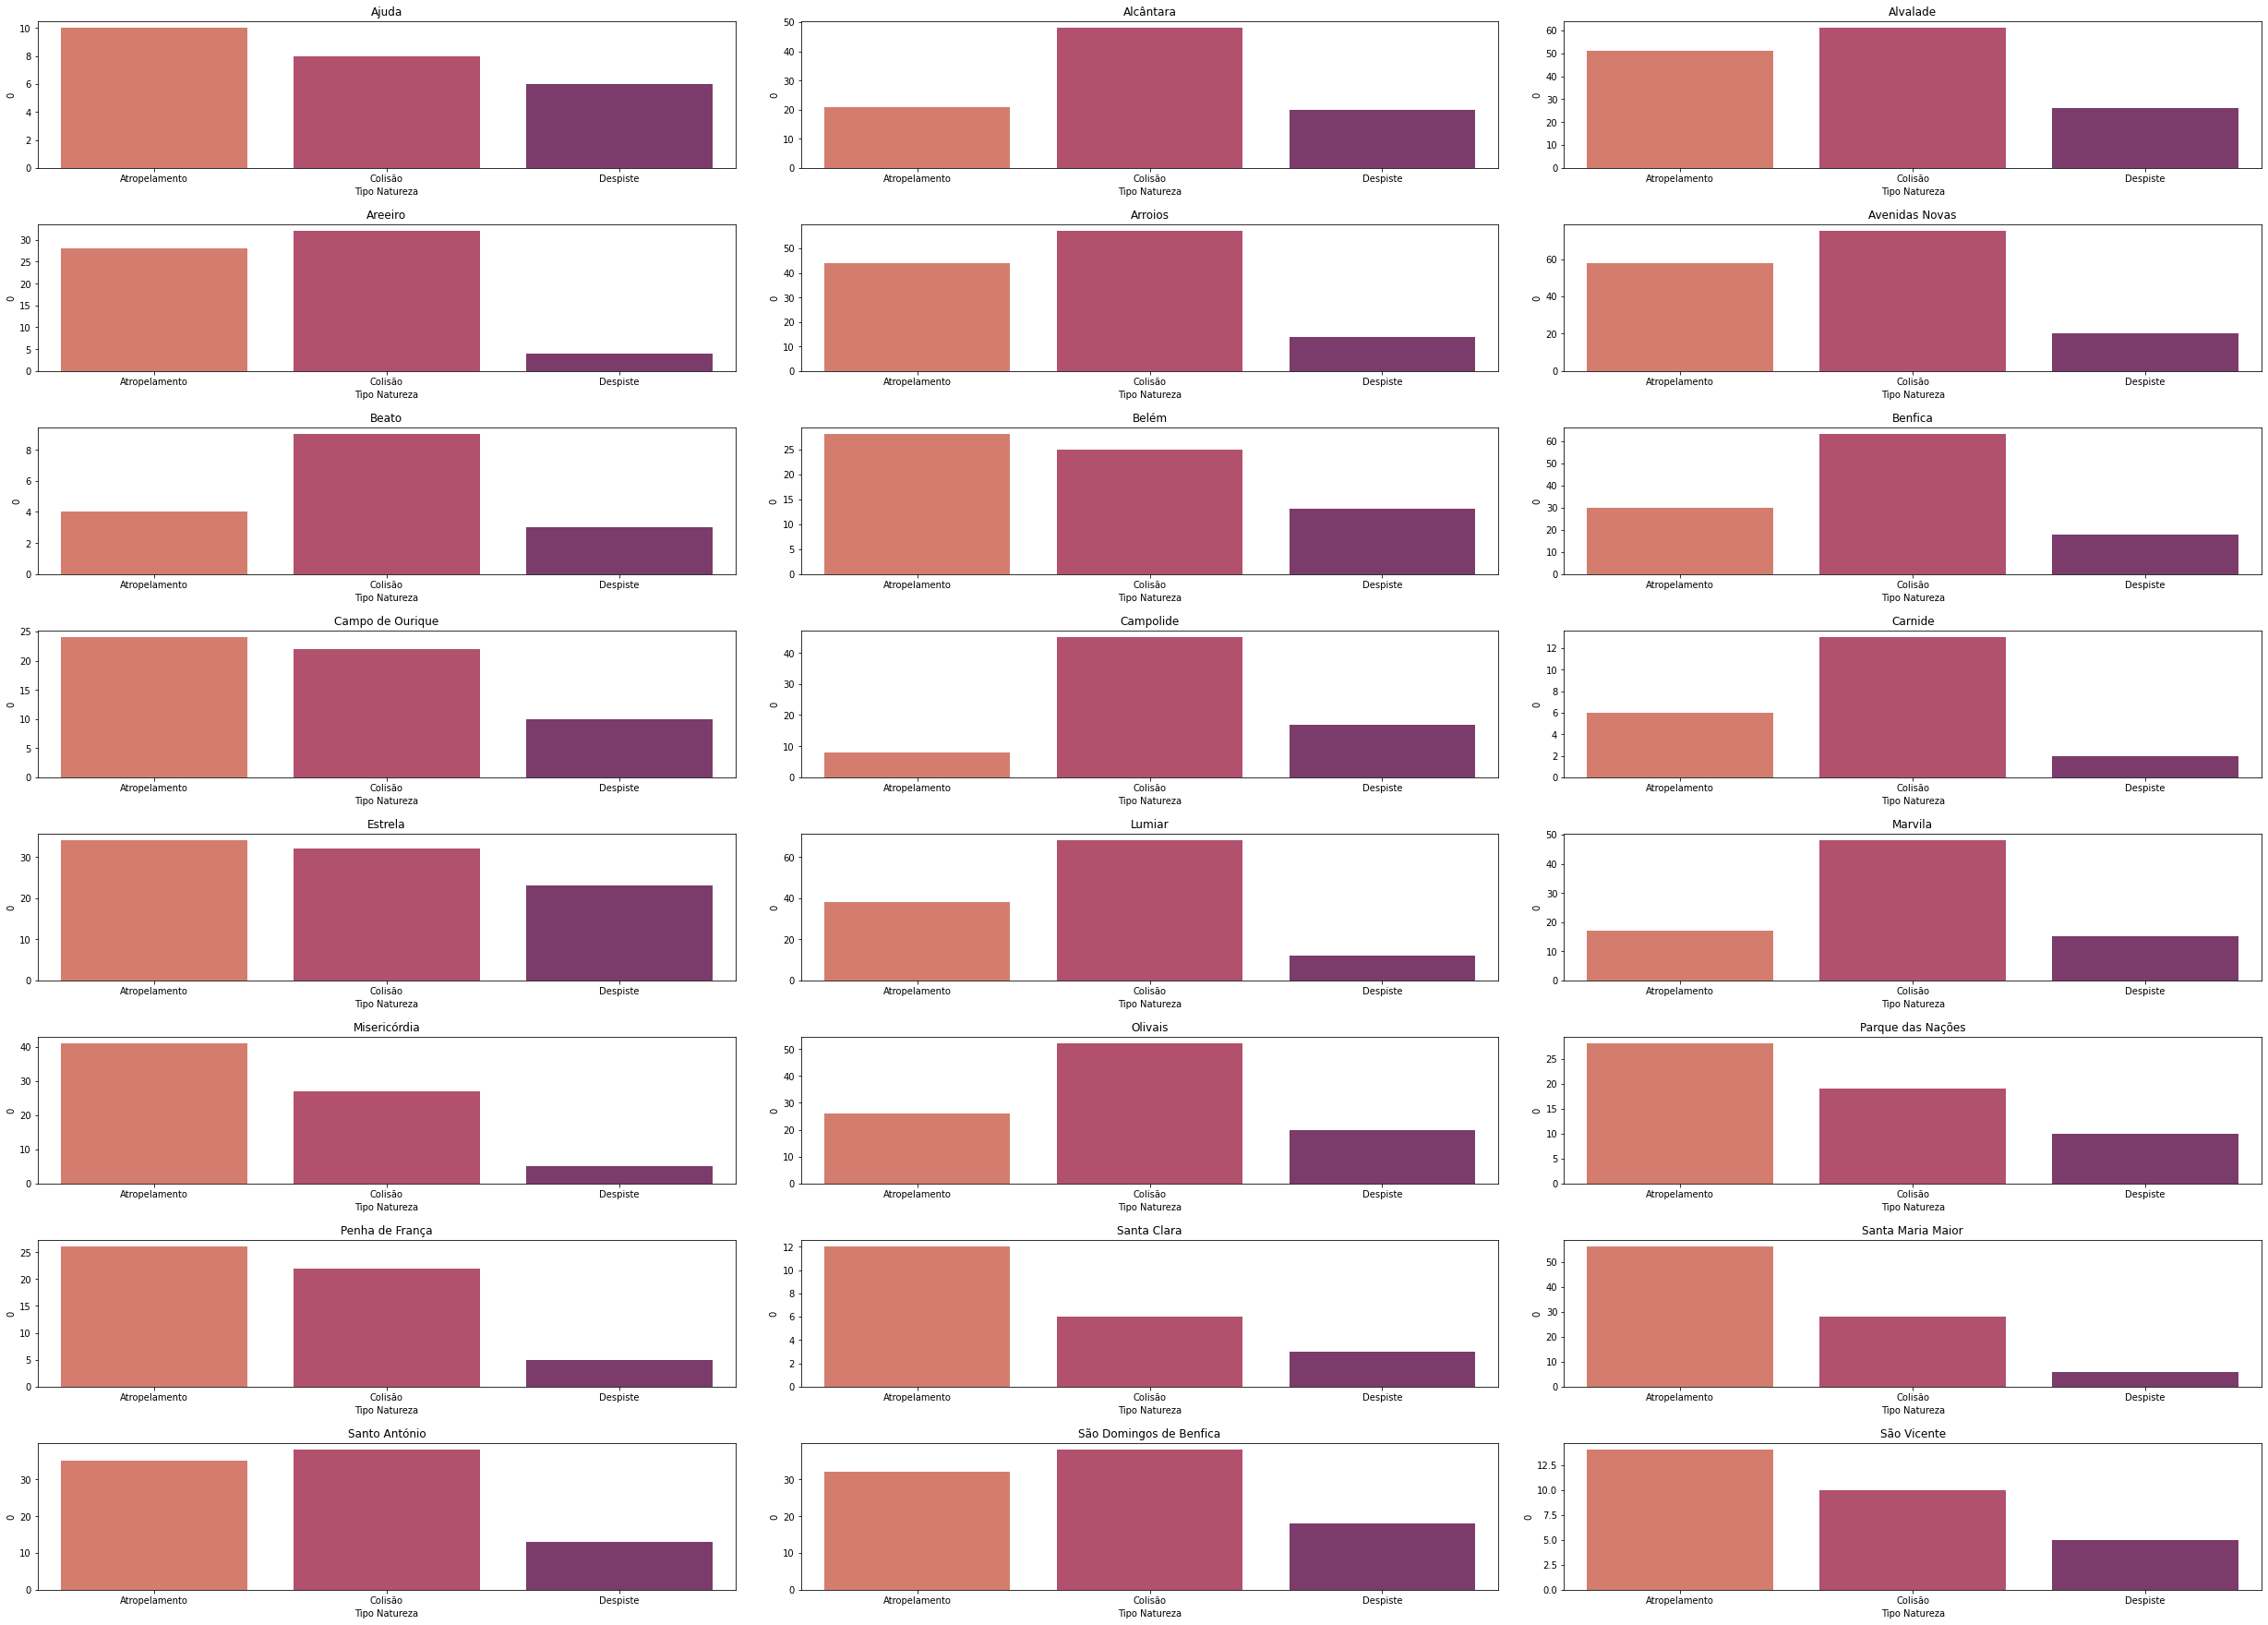

In [164]:
ncols = 3
fig, ax = plt.subplots(nrows=8, ncols=ncols, figsize=(35,25))
fig.tight_layout(pad=4.0)
r = 0
c = 0
for i, municip in enumerate(AcidentesTipo['NOME'].unique()):
    if c > ncols-1:
        r = r + 1
        c = 0

    for type in enumerate(AcidentesTipo['NOME'].unique()):
        plot = sns.barplot(data=AcidentesTipo[AcidentesTipo['NOME'] == municip], x='Tipo Natureza',y=0,
               label=type,
                           linewidth=3,
               palette='flare',
                ax=ax[r,c])
        plot.set_title(label=str(municip))
        # plot.get_legend().remove()
    c = c + 1

plt.show()

### 3.2.2. Road characteristics

In [165]:
RoadCharacteristics = ['Características Tecnicas','Estado Conservação','Tipo Piso','Marca Via','Reg Circulação','Traçado 1','Traçado 2','Traçado 3','Traçado 4','Sentidos','Via Trânsito','Intersecção Vias','Cond Aderência']
for i in range(len(RoadCharacteristics)):
    print(RoadCharacteristics[i]+':')
    print(dfAccidents[RoadCharacteristics[i]].value_counts())
    print("")

Características Tecnicas:
Estrada sem separador    1552
Outra via                1115
Auto-estrada              101
Name: Características Tecnicas, dtype: int64

Estado Conservação:
Em estado regular    1684
Em bom estado        1011
Em mau estado          45
NÃO DEFINIDO           28
Name: Estado Conservação, dtype: int64

Tipo Piso:
Betuminoso          2510
Calçada              202
Betão de cimento      30
NÃO DEFINIDO          22
Terra batida           4
Name: Tipo Piso, dtype: int64

Marca Via:
Com marcas - separadoras de sentido e de vias de trânsito    1785
Sem marcas rodoviárias ou pouco visíveis                      705
Com marcas - separadoras de sentido de trânsito               255
NÃO DEFINIDO                                                   23
Name: Marca Via, dtype: int64

Reg Circulação:
Sentido único    1622
Dois sentidos    1142
Reversível          4
Name: Reg Circulação, dtype: int64

Traçado 1:
Recta           2327
Curva            422
NÃO DEFINIDO      19
Name: Tra

### 3.2.3. Sinalization

In [166]:
Sinalization = ['Sinais','Sinais Luminosos']
for i in range(len(Sinalization)):
    print(Sinalization[i]+':')
    print(dfAccidents[Sinalization[i]].value_counts())
    print("")

Sinais:
Outros                        1815
NÃO DEFINIDO                   531
Passagem de peões              300
Cedência de passagem           100
Stop                            20
Proibição de ultrapassagem       2
Name: Sinais, dtype: int64

Sinais Luminosos:
Inexistentes               1883
A funcionar normalmente     798
NÃO DEFINIDO                 38
Desligada                    29
Intermitente                 20
Name: Sinais Luminosos, dtype: int64



### 3.2.4. Ambient factors

In [167]:
Exogenous_factors = ['Factores Atmosféricos','Luminosidade']
for i in range(len(Exogenous_factors)):
    print(Exogenous_factors[i]+':')
    print(dfAccidents[Exogenous_factors[i]].value_counts())
    print("")

Factores Atmosféricos:
Bom tempo       2323
Chuva            418
NÃO DEFINIDO      27
Name: Factores Atmosféricos, dtype: int64

Luminosidade:
Em pleno dia             1830
Noite, com iluminação     778
Aurora ou crepúsculo      128
Noite, sem iluminação      16
NÃO DEFINIDO               10
Sol escandeante             6
Name: Luminosidade, dtype: int64



### 3.2.5. Vehicle Characteristics

In [168]:
Vehicle = ['Categoria Veículos','Tipo Veiculo','Carga Lotação','Certificado Adr','Inspecção Periódica','Seguros']
for i in range(len(Vehicle)):
    print(Vehicle[i]+':')
    print(vehic[Vehicle[i]].value_counts())
    print("")

Categoria Veículos:
Automóvel ligeiro                3349
Motociclo cilindrada <= 125cc     710
Motociclo cilindrada > 125cc      338
Automóvel pesado                  118
Ciclomotor                        114
Velocípede                         87
Velocípede com motor               79
Triciclo                           23
Veículo sobre carris                8
Desconhecido                        3
NÃO DEFINIDO                        2
Quadriciclo                         2
Veículo agrícola                    1
Name: Categoria Veículos, dtype: int64

Tipo Veiculo:
Passageiros         3054
NÃO DEFINIDO        1391
Mercadorias          331
Veículo Especial      39
Misto                 13
Tractor                6
Name: Tipo Veiculo, dtype: int64

Carga Lotação:
Sem carga                  4375
NÃO DEFINIDO                310
Carga bem acondicionada     139
Com lotação excedida         10
Name: Carga Lotação, dtype: int64

Certificado Adr:
NÃO DEFINIDO    4832
Inexistente        2
Name: Certi

### 3.2.6. Driver Characteristics

In [169]:
vehic['Age_bins'] = pd.cut(vehic['Idade'], 3, labels=["low", "medium", "high"])

driver = ['Sexo','Age_bins','Lesões a 30 dias','Acessórios Condutores','Acções Condutores']
for i in range(len(driver)):
    print(driver[i]+':')
    print(vehic[driver[i]].value_counts())
    print("")

Sexo:
Masculino       3486
Feminino        1144
NÃO DEFINIDO     204
Name: Sexo, dtype: int64

Age_bins:
medium    2132
low       2125
high       373
Name: Age_bins, dtype: int64

Lesões a 30 dias:
Ileso           2828
Ferido leve     1972
Ferido grave      30
Morto              4
Name: Lesões a 30 dias, dtype: int64

Acessórios Condutores:
Cinto de segurança           3047
Capacete                     1072
NÃO DEFINIDO                  488
Isento                        159
Sem uso de cinto/capacete      68
Name: Acessórios Condutores, dtype: int64

Acções Condutores:
Em marcha normal                                3625
NÃO DEFINIDO                                     304
Parado ou estacionado                            246
Mudança de direcção para a esquerda              231
Mudança de direcção para a direita                86
Marcha atrás                                      68
Início de marcha                                  50
Desvio brusco/ saída de fila de trânsito          37
M

### 3.2.7. Passenger Characteristics

In [170]:
passg['Age_bins'] = pd.cut(passg['Idade'], 3, labels=["low", "medium", "high"])

passenger = ['Sexo','Age_bins','Lesões a 30 dias','Acessórios Passageiro']
for i in range(len(passenger)):
    print(passenger[i]+':')
    print(passg[passenger[i]].value_counts())
    print("")

Sexo:
Feminino     409
Masculino    222
Name: Sexo, dtype: int64

Age_bins:
low       334
medium    205
high       92
Name: Age_bins, dtype: int64

Lesões a 30 dias:
Ferido leve     627
Morto             3
Ferido grave      1
Name: Lesões a 30 dias, dtype: int64

Acessórios Passageiro:
C/ capacete/ cinto segurança       510
S/ uso capacete/cinto segurança     45
NÃO DEFINIDO                        39
C/ sistema retenção de crianças     37
Name: Acessórios Passageiro, dtype: int64



### 3.2.8. Pawn Characteristics

In [171]:
pawns['Age_bins'] = pd.cut(pawns['Idade'], 3, labels=["low", "medium", "high"])

pawn = ['Sexo','Age_bins','Lesões a 30 dias','Acções Peão']
for i in range(len(pawn)):
    print(pawn[i]+':')
    print(pawns[pawn[i]].value_counts())
    print("")


Sexo:
Feminino     391
Masculino    309
Name: Sexo, dtype: int64

Age_bins:
medium    299
low       236
high      165
Name: Age_bins, dtype: int64

Lesões a 30 dias:
Ferido leve     660
Ferido grave     36
Ileso             3
Morto             1
Name: Lesões a 30 dias, dtype: int64

Acções Peão:
Atravessando em passagem sinalizada                                                                   289
Atravessando fora da passagem de peões, a menos de 50m de uma passagem                                113
Atravessando em passagem sinalizada com desrespeito da sinalização semafórica                          58
Atravessando fora da passagem de peões a mais de 50m de uma passagem ou quando não exista passagem     54
Em plena faixa de rodagem                                                                              51
Transitando pela berma ou passeio                                                                      49
Surgindo inesperadamente na faixa de rodagem de trás de um obstácul

<a id='in-depth_analysis'></a>
## 3.3. In-depth Exploration

### 3.3.1. Accidents per Parish

In [172]:
gpdLisbon.groupby('NOME')['count'].sum()

NOME
Ajuda                       24
Alcântara                   89
Alvalade                   138
Areeiro                     64
Arroios                    115
Avenidas Novas             153
Beato                       16
Belém                       66
Benfica                    111
Campo de Ourique            56
Campolide                   70
Carnide                     21
Estrela                     89
Lumiar                     118
Marvila                     80
Misericórdia                73
Olivais                     98
Parque das Nações           57
Penha de França             53
Santa Clara                 21
Santa Maria Maior           90
Santo António               86
São Domingos de Benfica     88
São Vicente                 29
Name: count, dtype: int64

### 3.3.2. Accidents per day and per month

In [173]:
#Creates a dataframe with the number of accidents per day
Accidents_per_day=pd.DataFrame(dfAccidents['Date_aux'].value_counts()).reset_index()
Accidents_per_day.sort_index()
Accidents_per_day.rename(columns={'Date_aux':'n_Accidents','index':'Date'},inplace=True)
Accidents_per_day.Date = pd.to_datetime(Accidents_per_day.Date)
Accidents_per_day.dtypes

#Number of accidents per month
Accidents_per_day['Accident_month'] = Accidents_per_day.Date.dt.month
Accidents_per_day.groupby('Accident_month')['n_Accidents'].sum()

#Mean of accidents per month
Mean_Month=Accidents_per_day.groupby('Accident_month')['n_Accidents'].sum().mean()

#Mean of accidents per day
Mean_Day=Accidents_per_day['n_Accidents'].mean()

print("Mean of accidents per month: {}".format(Mean_Month))
print("Mean of accidents per day: {}".format(Mean_Day))

Mean of accidents per month: 230.66666666666666
Mean of accidents per day: 7.604395604395604


### 3.3.3. Accidents per part of day

In [174]:
dfAccidents['part_of_day'].value_counts()

Afternoon    1079
Morning       838
Evening       621
Night         181
Name: part_of_day, dtype: int64

### 3.3.4. Accidents per weekday

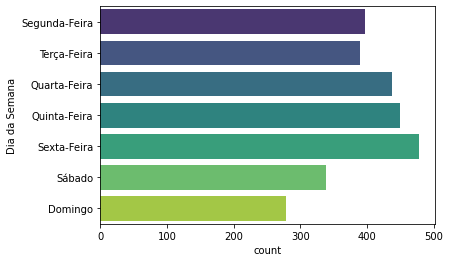

In [175]:
weekDays = ['Segunda-Feira', 'Terça-Feira','Quarta-Feira','Quinta-Feira','Sexta-Feira','Sábado','Domingo']

sns.countplot(y='Dia da Semana', palette='viridis', data=dfAccidents, order=weekDays)
plt.savefig(os.path.join("charts","weekday.png"), bbox_inches='tight')

### 3.3.5. Accident by Time of day

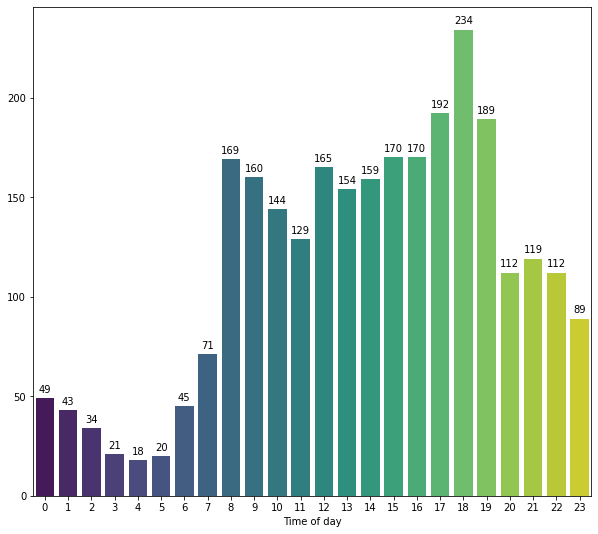

In [176]:
data = dfAccidents.groupby('hour')['hour'].count()

plt.figure(figsize=(10,9))
plot = sns.barplot(x=data.index,y=data.values, palette='viridis')
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plot.set(xlabel='Time of day', ylabel=None)
# plot.legend(loc='upper right')
# plt.show()
plt.savefig(os.path.join("charts","hours.png"), bbox_inches='tight')

### 3.3.6. Accident by weekday and time of day

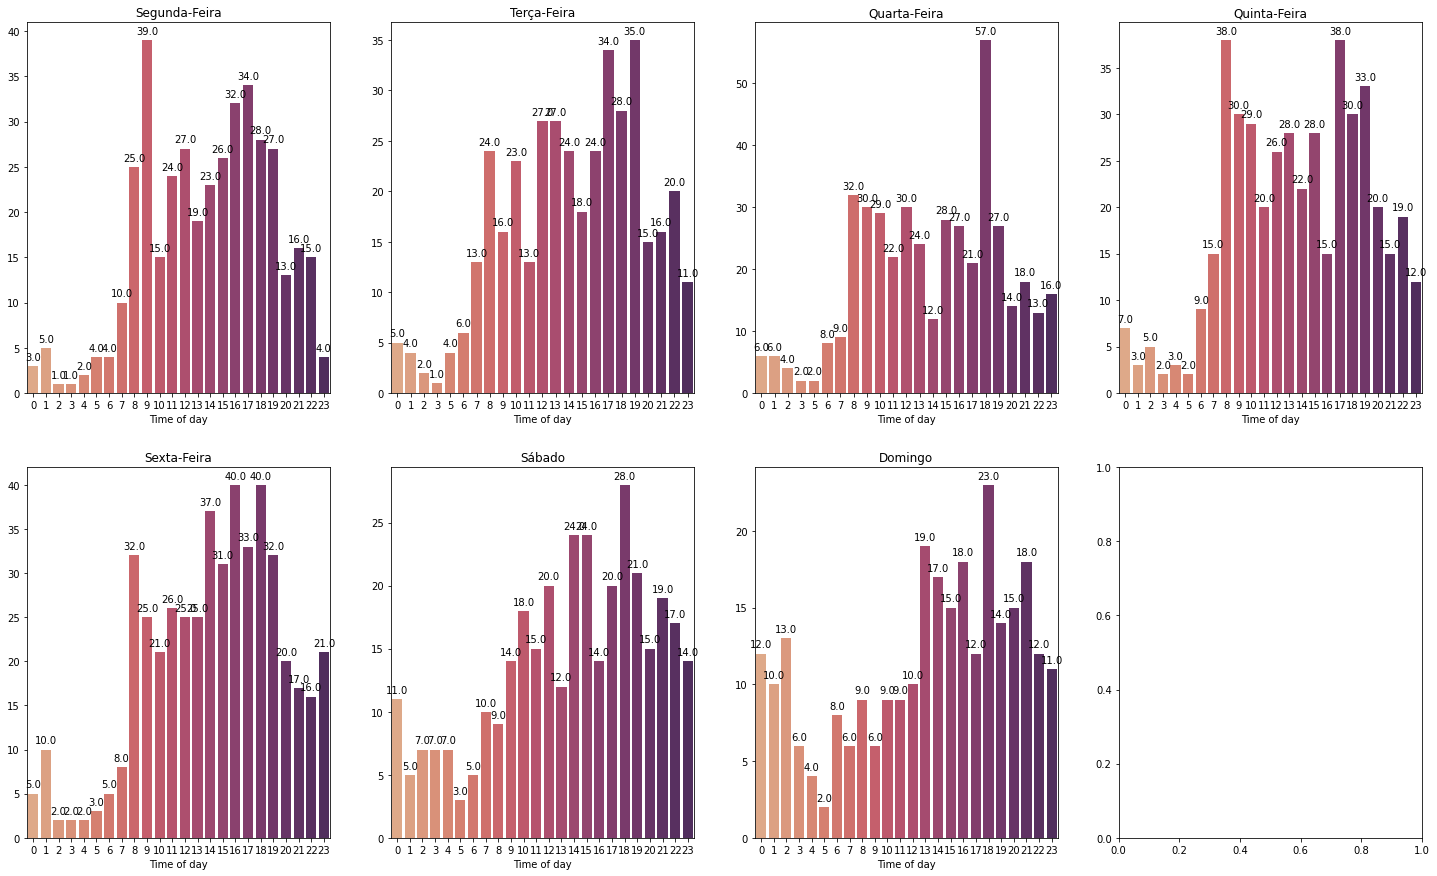

In [177]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(25,15))
r = 0
c = 0
for w in weekDays:
    if c > 3:
        r = r + 1
        c = 0

    plot = sns.countplot(data=dfAccidents[dfAccidents['Dia da Semana']==w], x='hour', linewidth=3, palette='flare', ax=ax[r,c])
    c = c + 1
    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.1f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'center',
                       xytext = (0, 9),
                       textcoords = 'offset points')
    plot.set(xlabel='Time of day', ylabel=None)
    plot.set_title(label=str(w))
plt.show()

### 3.3.7 Accident by Parish, weekday and hour

In [178]:
dfAccMunicpDateTime = gpdAccidents_Municip[['NOME', 'Dia da Semana', 'hour']].value_counts().reset_index()
dfAccMunicpDateTime.rename(columns={0: 'count'}, inplace=True)
dfAccMunicpDateTime

NOME  Dia da Semana  hour  count
0              Avenidas Novas   Quarta-Feira    18      5
1              Avenidas Novas  Segunda-Feira    17      5
2     São Domingos de Benfica  Segunda-Feira    17      5
3                    Alvalade   Quinta-Feira    13      5
4              Avenidas Novas  Segunda-Feira    19      5
...                       ...            ...   ...    ...
1295         Campo de Ourique        Domingo    13      1
1296         Campo de Ourique        Domingo    21      1
1297         Campo de Ourique   Quarta-Feira     2      1
1298         Campo de Ourique   Quarta-Feira     3      1
1299              São Vicente    Terça-Feira    19      1

[1300 rows x 4 columns]

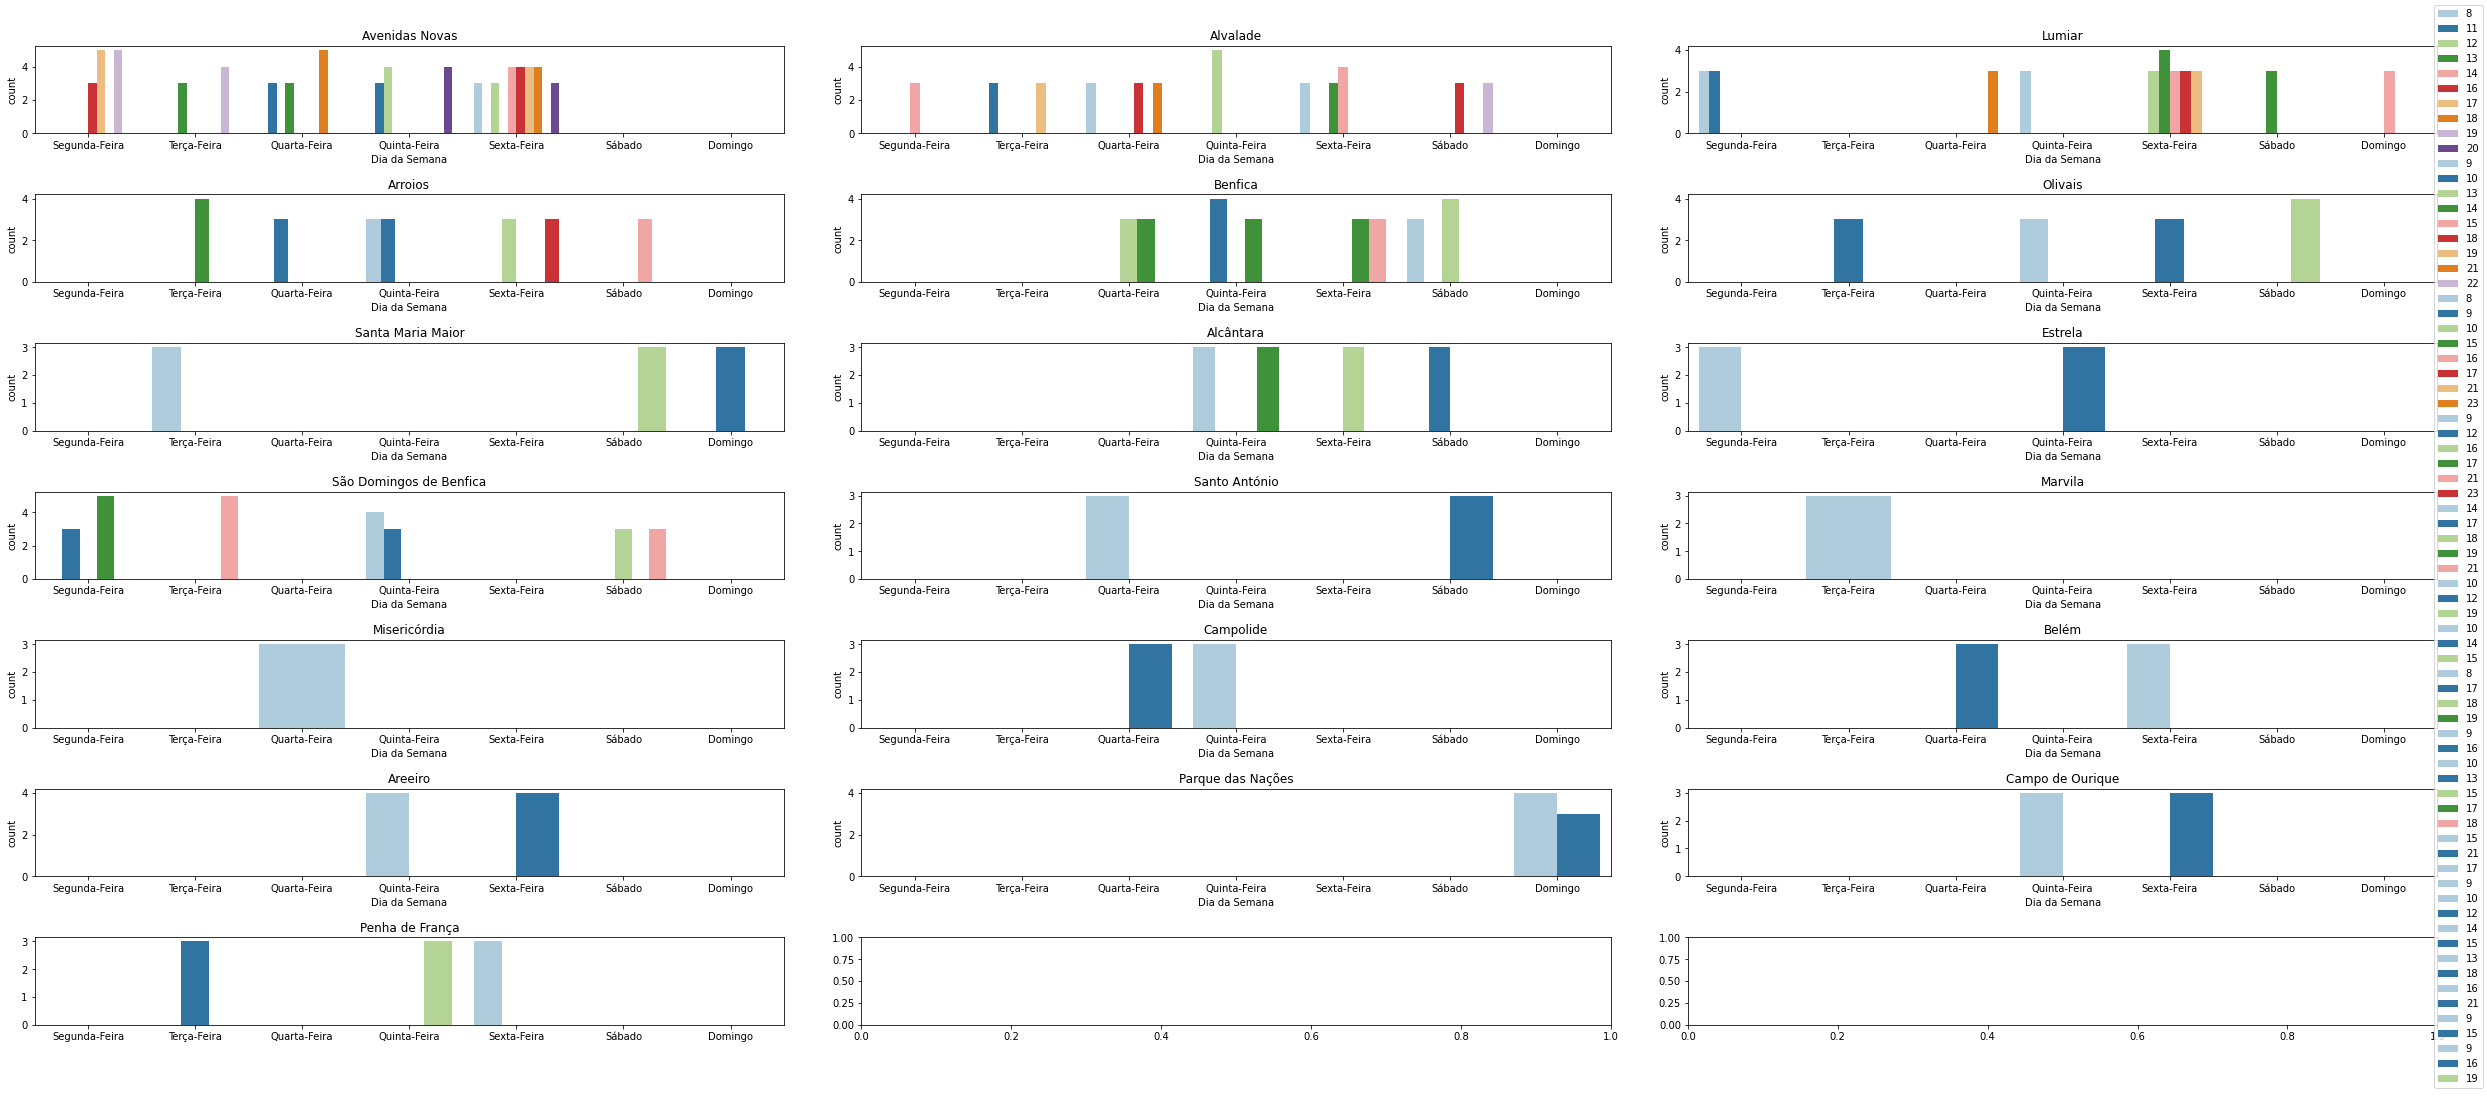

In [179]:
r = 0
c = 0
ncols = 3
fig, ax = plt.subplots(nrows=7, ncols=ncols, figsize=(35,15))
fig.tight_layout(pad=4.0)
parishes =  gpdLisbon['NOME'].values
moreThanAccidents = 2

for municip in parishes:

    if c > ncols-1:
        r = r + 1
        c = 0

    dfMunicipFilter = dfAccMunicpDateTime[(dfAccMunicpDateTime['NOME']==municip) &
                                  (dfAccMunicpDateTime['count'] > moreThanAccidents)][['NOME', 'Dia da Semana', 'hour', 'count']]
    if len(dfMunicipFilter)> 0:
        plot = sns.barplot(data=dfMunicipFilter, x='Dia da Semana',y='count', hue='hour', linewidth=3, palette='Paired', order=weekDays, ax=ax[r,c])
        plot.set_title(label=str(municip))
        plot.get_legend().remove()
    c = c + 1


plot.set(xlabel=None, ylabel=None)
fig.legend(loc='upper right')

plt.show()

[BACK TO TOC](#toc)
<a id='visual-exploration'></a>
# 4. Visual Exploration

<a id='parishes'></a>
## 4.1. Lisbon Parish

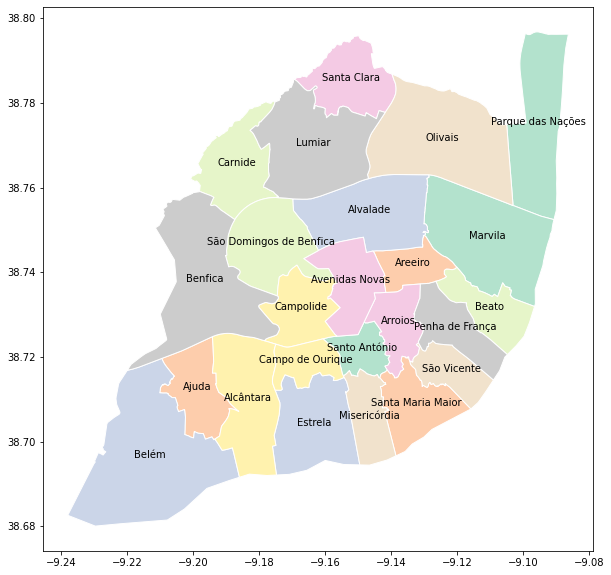

In [180]:
fig, ax = plt.subplots(figsize=(20,10))
gpdMunLisbon.plot(ax=ax, markersize=10 ,cmap='Pastel2', edgecolor='white')
gpdMunLisbon.apply(lambda x: ax.annotate(text=x.NOME, xy=x.geometry.centroid.coords[0], ha='center'),axis=1);

<a id='accidents'></a>
## 4.2. Traffic Accidents

<AxesSubplot:>

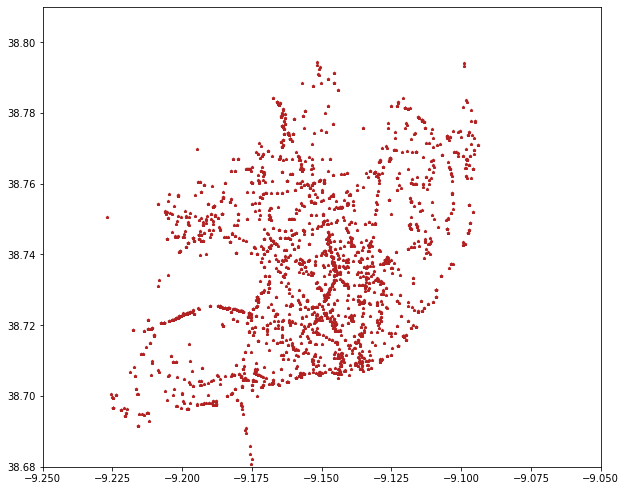

In [181]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim(-9.25, -9.05)
ax.set_ylim(38.68, 38.81)
dfAcidentesGPS.plot(ax=ax, markersize=7 ,color="Firebrick",marker='*')

<a id='fullmap'></a>
## 4.3. Lisbon Parishes, Traffic accidents and Roads

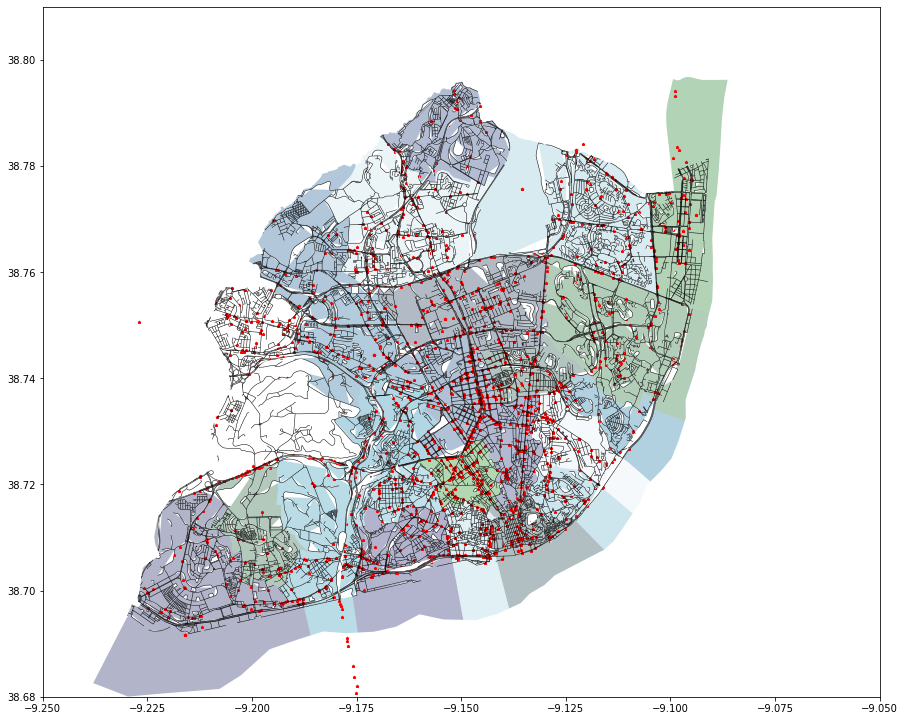

In [182]:
fig, ax = plt.subplots(figsize=(15,15))

ax.set_xlim(-9.25, -9.05)
ax.set_ylim(38.68, 38.81)

#Plot parishes
gpdMunLisbon.plot(ax=ax, markersize=5 ,cmap='ocean', linewidth=0.03,legend=True,edgecolor='white',alpha=0.3)

#Plot roads
gpdSlopes.plot(ax=ax,linewidth=0.5,facecolor='white',edgecolor="black")

#Plot Accidents
gpdAccidents_Municip.plot(ax=ax, markersize=7 ,color="red",marker='*')


plt.show()
fig.savefig(os.path.join("charts","acidentes_municip_clean.png"), bbox_inches='tight')

### 4.3.1. Parish with the highest number of accidents

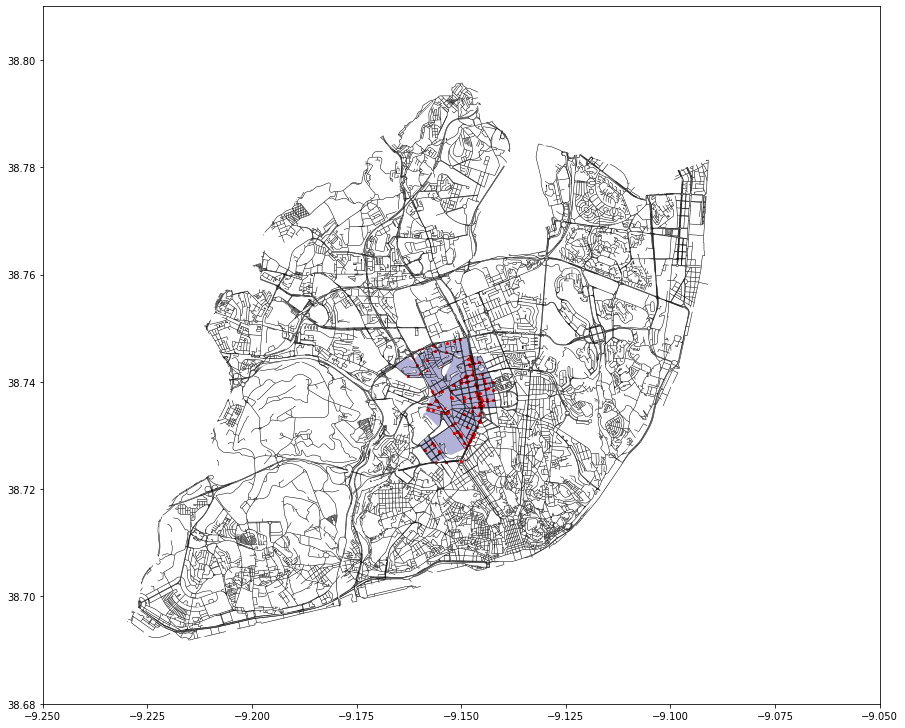

In [183]:
fig, ax = plt.subplots(figsize=(15,15))

ax.set_xlim(-9.25, -9.05)
ax.set_ylim(38.68, 38.81)

gpdMunLisbon[gpdMunLisbon['NOME']=='Avenidas Novas'].plot(ax=ax, markersize=5 ,cmap='jet', linewidth=0.03,legend=True,edgecolor='white',alpha=0.3)
gpdSlopes.plot(ax=ax,linewidth=0.5,facecolor='white',edgecolor="black")
gpdAccidents_Municip[gpdAccidents_Municip['NOME']=='Avenidas Novas'].plot(ax=ax, markersize=7 ,color="red",marker='*')

plt.show()

### 4.3.2. Parish with the lowest number of accidents

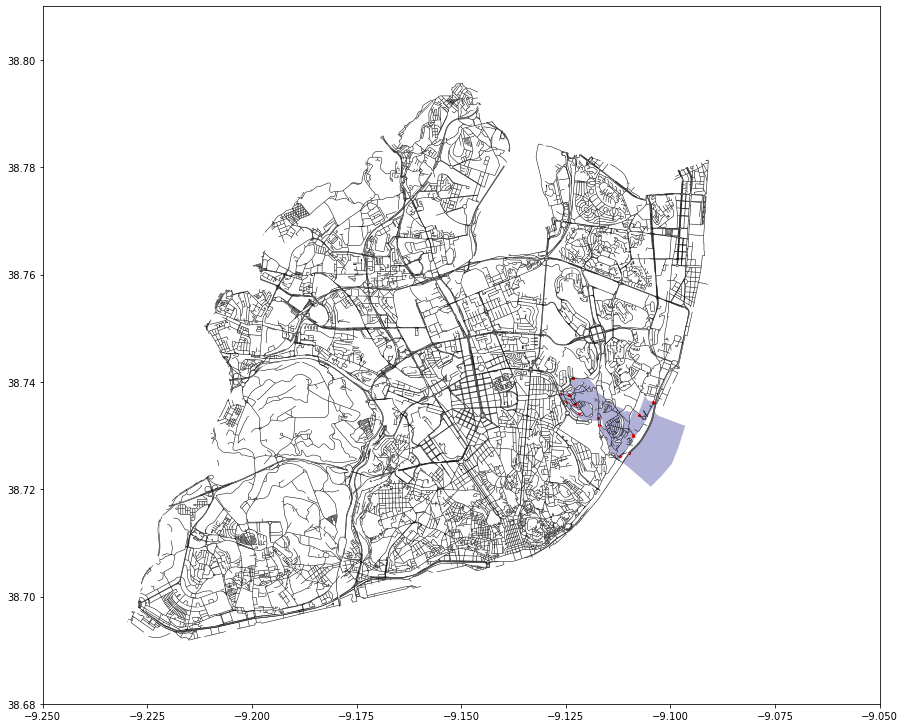

In [184]:
fig, ax = plt.subplots(figsize=(15,15))

ax.set_xlim(-9.25, -9.05)
ax.set_ylim(38.68, 38.81)

gpdMunLisbon[gpdMunLisbon['NOME']=='Beato'].plot(ax=ax, markersize=5 ,cmap='jet', linewidth=0.03,legend=True,edgecolor='white',alpha=0.3)
gpdSlopes.plot(ax=ax,linewidth=0.5,facecolor='white',edgecolor="black")
gpdAccidents_Municip[gpdAccidents_Municip['NOME']=='Beato'].plot(ax=ax, markersize=7 ,color="red",marker='*')

plt.show()

<a id='accidents-parish'></a>
## 4.4. Number of accidents per Parish

In [185]:
uniqueFreg = gpdMunLisbon[['NOME', 'geometry']].drop_duplicates()
uniqueFreg = pd.merge(uniqueFreg, gpdLisbon, how='inner', on='NOME')
uniqueFreg

NOME  \
0             Santo António   
1         Parque das Nações   
2                   Marvila   
3                     Ajuda   
4                   Areeiro   
5         Santa Maria Maior   
6                  Alvalade   
7                     Belém   
8                   Estrela   
9                   Arroios   
10              Santa Clara   
11           Avenidas Novas   
12                  Carnide   
13  São Domingos de Benfica   
14                    Beato   
15                Campolide   
16                Alcântara   
17         Campo de Ourique   
18              São Vicente   
19                  Olivais   
20             Misericórdia   
21                   Lumiar   
22          Penha de França   
23                  Benfica   

                                             geometry  count  
0   POLYGON ((-9.14492 38.72825, -9.14405 38.72731...     86  
1   POLYGON ((-9.09570 38.79676, -9.09569 38.79676...     57  
2   POLYGON ((-9.12567 38.76252, -9.12532 38.76243...     80  
3   POLYGON ((-9.19303 38.71619, -9.19295 38.71368...     24  
4   POLYGON ((-9.12374 38.73866, -9.12477 38.73829...     64  
5   POLYGON ((-9.13504 38.71978, -9.13499 38.71978...     90  
6   POLYGON ((-9.12857 38.76302, -9.12859 38.76279...    138  
7   POLYGON ((-9.20591 38.71526, -9.20620 38.71482...     66  
8   POLYGON ((-9.16081 38.71555, -9.16075 38.71554...     89  
9   POLYGON ((-9.13306 38.73019, -9.13311 38.73008...    115  
10  POLYGON ((-9.14846 38.79474, -9.14832 38.79471...     21  
11  POLYGON ((-9.14758 38.74494, -9.14752 38.74464...    153  
12  POLYGON ((-9.17522 38.78027, -9.17522 38.78025...     21  
13  POLYGON ((-9.16970 38.75732, -9.16978 38.75707...     88  
14  POLYGON ((-9.12374 38.73866, -9.12323 38.73894...     16  
15  POLYGON ((-9.16667 38.73939, -9.16642 38.73922...     70  
16  POLYGON ((-9.17812 38.72376, -9.17800 38.72373...     89  
17  POLYGON ((-9.15764 38.72246, -9.15735 38.72230...     56  
18  POLYGON ((-9.12715 38.72365, -9.12646 38.72317...     29  
19  POLYGON ((-9.13429 38.78492, -9.13393 38.78485...     98  
20  POLYGON ((-9.14552 38.71556, -9.14510 38.71549...     73  
21  POLYGON ((-9.16682 38.78379, -9.16624 38.78332...    118  
22  POLYGON ((-9.12640 38.73774, -9.12602 38.73707...     53  
23  POLYGON ((-9.19402 38.75724, -9.19439 38.75657...    111

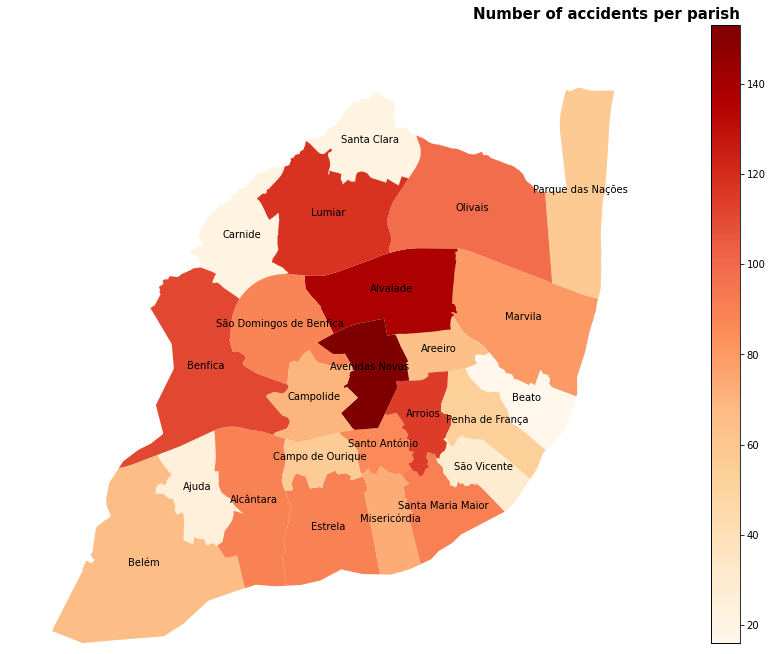

In [186]:
fig, ax = plt.subplots(figsize=(15,15))

ax.set_xlim(-9.25, -9.05)
ax.set_ylim(38.68, 38.81)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad="-15%")
uniqueFreg.plot(column='count', ax=ax, legend=True, cax=cax, cmap='OrRd')

#remove axis
sns.despine(top=True,right=True)

#Title
plt.title('Number of accidents per parish',fontsize=15,fontweight='bold',loc='right')

uniqueFreg.apply(lambda x: ax.annotate(text=x.NOME, xy=x.geometry.centroid.coords[0], ha='center'),axis=1);
ax.axis('off')
plt.savefig(os.path.join("charts","acidentes_municip.png"), bbox_inches='tight')

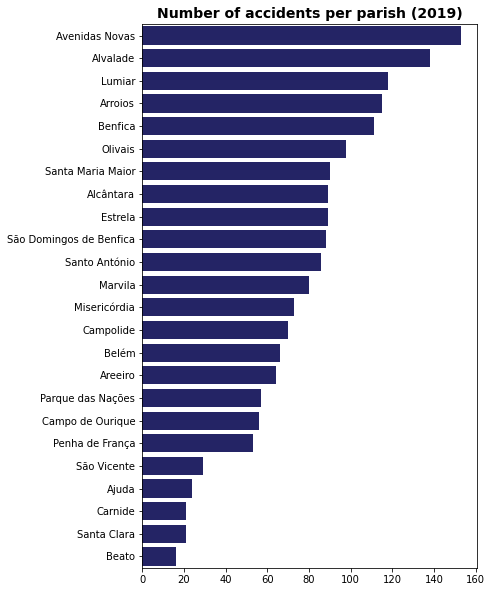

<function matplotlib.pyplot.show(close=None, block=None)>

In [187]:
#Create dataframe with information to plot
df1= gpdMunicip_Accidents['NOME'].value_counts().rename_axis('NOME').reset_index(name='n_Accidents')

#Create the chart
fig, ax = plt.subplots(figsize=(6, 10))
sns.set_color_codes("pastel")
sns.barplot(x='n_Accidents', y= 'NOME', data= df1, label="Number of accidents", color='midnightblue')

#Add title
plt.title('Number of accidents per parish (2019)', fontsize = 14, weight = 'bold')

#Remove axis titles
ax.set_ylabel('')
ax.set_xlabel('')

plt.show()

#Export png
fig.savefig(os.path.join("charts","gpdAccidents_N_Accidents_bar_chart.png"), bbox_inches='tight')

plt.show

<a id='accidents-per-day'></a>
## 4.5. Number of accidents per day

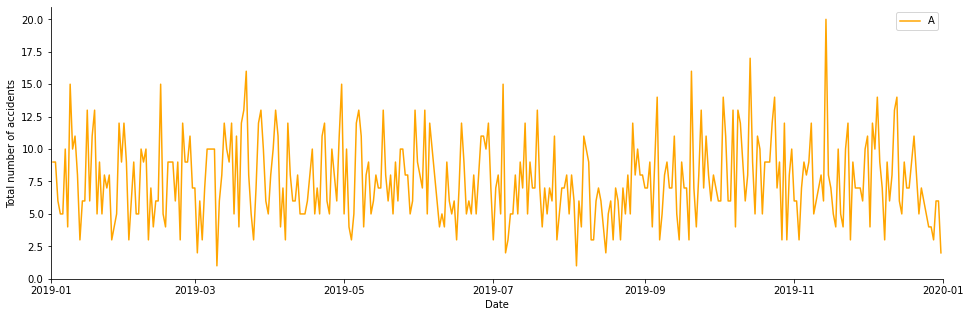

In [188]:
#plot the graph
fig,axes = plt.subplots(figsize=(16,5))
ax=sns.lineplot(x='Date',y='n_Accidents',data=Accidents_per_day,color='Orange',alpha=1)

sns.despine(top=True,right=True)
axes.set_ylim(0)
axes.set_xlim([datetime.date(2019, 1, 1), datetime.date(2020, 1, 1)])
axes.set_ylabel('Total number of accidents')
axes.set_xlabel('Date')
plt.legend('Accidents', fontsize=10,loc='upper right')
plt.show()
fig.savefig(os.path.join("charts","accidents_per_day.png"), bbox_inches='tight')

<a id='accidents-type-parish'></a>
## 4.6. Accident type by Parish

In [189]:
uniqueFregTipo = gpdMunLisbon[['NOME', 'geometry']].drop_duplicates()
uniqueFregTipo = pd.merge(uniqueFregTipo, AcidentesTipo, how='inner', on='NOME')
uniqueFregTipo = uniqueFregTipo.drop_duplicates(subset=['NOME', 'Tipo Natureza'])
uniqueFregTipo

NOME                                           geometry  \
0       Santo António  POLYGON ((-9.14492 38.72825, -9.14405 38.72731...   
1       Santo António  POLYGON ((-9.14492 38.72825, -9.14405 38.72731...   
2       Santo António  POLYGON ((-9.14492 38.72825, -9.14405 38.72731...   
3   Parque das Nações  POLYGON ((-9.09570 38.79676, -9.09569 38.79676...   
4   Parque das Nações  POLYGON ((-9.09570 38.79676, -9.09569 38.79676...   
..                ...                                                ...   
67    Penha de França  POLYGON ((-9.12640 38.73774, -9.12602 38.73707...   
68    Penha de França  POLYGON ((-9.12640 38.73774, -9.12602 38.73707...   
69            Benfica  POLYGON ((-9.19402 38.75724, -9.19439 38.75657...   
70            Benfica  POLYGON ((-9.19402 38.75724, -9.19439 38.75657...   
71            Benfica  POLYGON ((-9.19402 38.75724, -9.19439 38.75657...   

    Tipo Natureza   0  
0   Atropelamento  35  
1         Colisão  38  
2        Despiste  13  
3   Atropelamento  28  
4         Colisão  19  
..            ...  ..  
67        Colisão  22  
68       Despiste   5  
69  Atropelamento  30  
70        Colisão  63  
71       Despiste  18  

[72 rows x 4 columns]

### 4.6.1. Colision

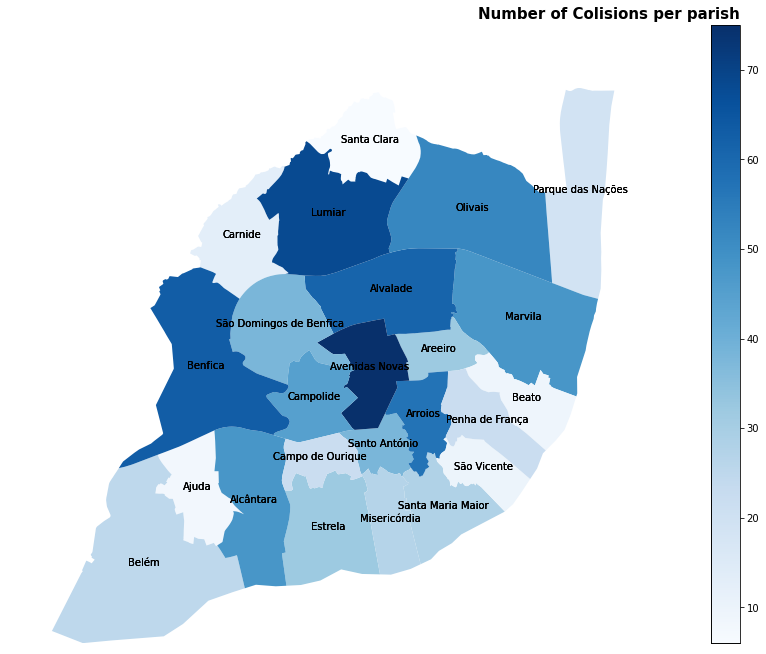

In [190]:
fig, ax = plt.subplots(figsize=(15,15))

ax.set_xlim(-9.25, -9.05)
ax.set_ylim(38.68, 38.81)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad="-15%")
uniqueFregTipo[uniqueFregTipo['Tipo Natureza']=='Colisão'].plot(column=0, ax=ax, legend=True, cax=cax,cmap='Blues')

#remove axis
sns.despine(top=True,right=True)

#Title
plt.title('Number of Colisions per parish',fontsize=15,fontweight='bold',loc='right')

uniqueFregTipo.apply(lambda x: ax.annotate(text=x.NOME, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)
ax.axis('off')
plt.savefig(os.path.join("charts","colisao_municip.png"), bbox_inches='tight')

### 4.6.2. Runover

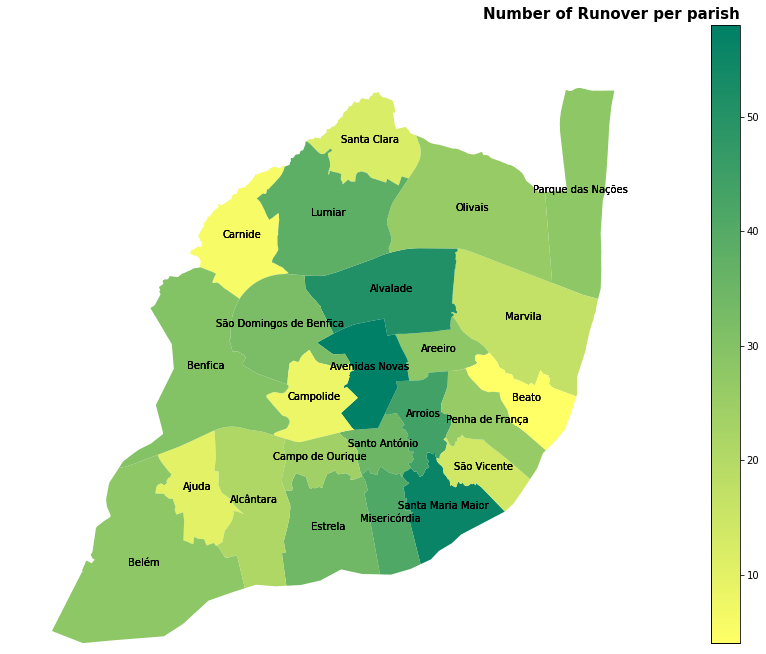

In [191]:
fig, ax = plt.subplots(figsize=(15,15))

ax.set_xlim(-9.25, -9.05)
ax.set_ylim(38.68, 38.81)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad="-15%")
uniqueFregTipo[uniqueFregTipo['Tipo Natureza']=='Atropelamento'].plot(column=0, ax=ax, legend=True, cax=cax,cmap='summer_r')

#remove axis
sns.despine(top=True,right=True)

#Title
plt.title('Number of Runover per parish',fontsize=15,fontweight='bold',loc='right')

uniqueFregTipo.apply(lambda x: ax.annotate(text=x.NOME, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)
ax.axis('off')
plt.savefig(os.path.join("charts","atropelamento_municip.png"), bbox_inches='tight')

### 4.6.3. Despiste

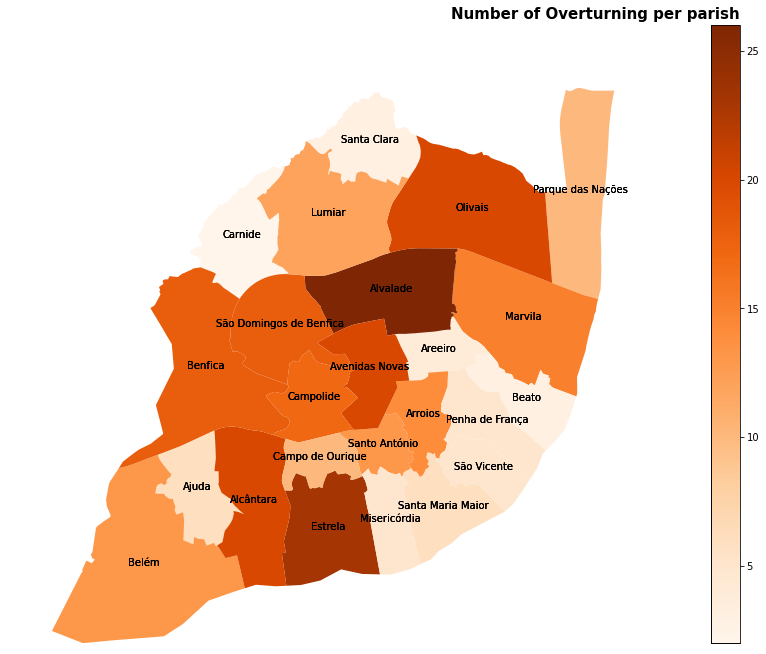

In [192]:
fig, ax = plt.subplots(figsize=(15,15))

ax.set_xlim(-9.25, -9.05)
ax.set_ylim(38.68, 38.81)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad="-15%")
uniqueFregTipo[uniqueFregTipo['Tipo Natureza']=='Despiste'].plot(column=0, ax=ax, legend=True, cax=cax,cmap='Oranges')

#remove axis
sns.despine(top=True,right=True)

#Title
plt.title('Number of Overturning per parish',fontsize=15,fontweight='bold',loc='right')

uniqueFregTipo.apply(lambda x: ax.annotate(text=x.NOME, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)
ax.axis('off')
plt.savefig(os.path.join("charts","despiste_municip.png"), bbox_inches='tight')

[BACK TO TOC](#toc)
<a id='external-factors'></a>
# 5. Identifying external factors' impact on accidents

<a id='setup-dataset'></a>
## 5.1. Set up the dataset

In [193]:
dfModel = geoParishdata.copy()
dfModel.drop(columns=["geometry", "Freguesia"], inplace=True) # Dropping the geometry column because it is not essential for the model computation
dfModel.describe()

population    Active_Pop  Desempregados  Commute_Automovel_Cond  \
count     24.000000     24.000000      24.000000               24.000000   
mean   23029.166667  11835.958333    1392.958333             4782.708333   
std     9519.088350   5698.780438     722.886092             3058.683839   
min    11836.000000   5631.000000     598.000000             1176.000000   
25%    15429.750000   6831.750000     910.500000             2459.000000   
50%    20578.000000  10213.500000    1049.000000             4040.000000   
75%    31693.000000  16118.250000    1772.000000             6321.750000   
max    45605.000000  23658.000000    2986.000000            11586.000000   

       Commute_Automovel_Pass  Commute_Moto  Commute_Bicycle       AREA_M2  \
count               24.000000     24.000000        24.000000  2.400000e+01   
mean              1907.000000    127.541667        26.750000  4.168925e+06   
std               1198.339068     50.650533        18.603997  2.399558e+06   
min                450.000000     40.000000         4.000000  1.494349e+06   
25%                889.250000     95.250000        12.750000  2.410881e+06   
50%               1681.000000    113.500000        21.500000  3.183577e+06   
75%               2439.250000    159.000000        33.250000  5.365094e+06   
max               4520.000000    257.000000        72.000000  1.042695e+07   

       N_Accidents  N_Metro_Stations  Avg_Price_Sqr_Mt  N_Crossroads  
count    24.000000         24.000000         24.000000       24.0000  
mean     75.208333          1.833333       3364.875000       28.8750  
std      37.117884          1.659404        719.981118       20.5433  
min      16.000000          0.000000       2354.000000        3.0000  
25%      55.250000          0.750000       2864.000000       16.0000  
50%      76.500000          1.000000       3239.500000       24.0000  
75%      92.000000          3.000000       3846.000000       35.0000  
max     153.000000          5.000000       4932.000000       91.0000

<a id='stat-analysis'></a>
## 5.2. Statistical Analysis

### 5.2.1. Check for skewness and kurtosis

In [194]:
dfModel = pd.DataFrame(dfModel)
skew = dfModel.skew()
print(skew)
skewNumVariables = skew[(skew > 1) | (skew < -1)]
print("\nSkewed variables:")
print(skewNumVariables)

kurt = dfModel[dfModel.columns].kurt()
print("\nVariables with kurtosis > 3:")
kurtHigh = kurt[kurt > 3]
print(kurtHigh)

population                0.777726
Active_Pop                0.859036
Desempregados             1.123044
Commute_Automovel_Cond    1.031118
Commute_Automovel_Pass    1.039393
Commute_Moto              0.518663
Commute_Bicycle           1.044514
AREA_M2                   1.077167
N_Accidents               0.133386
N_Metro_Stations          0.599742
Avg_Price_Sqr_Mt          0.672742
N_Crossroads              1.309319
dtype: float64

Skewed variables:
Desempregados             1.123044
Commute_Automovel_Cond    1.031118
Commute_Automovel_Pass    1.039393
Commute_Bicycle           1.044514
AREA_M2                   1.077167
N_Crossroads              1.309319
dtype: float64

Variables with kurtosis > 3:
Series([], dtype: float64)


There are a few variables with a small skew and none with kurtosis > 3

### 5.2.2. Plot the pairwise relationships of the variables.

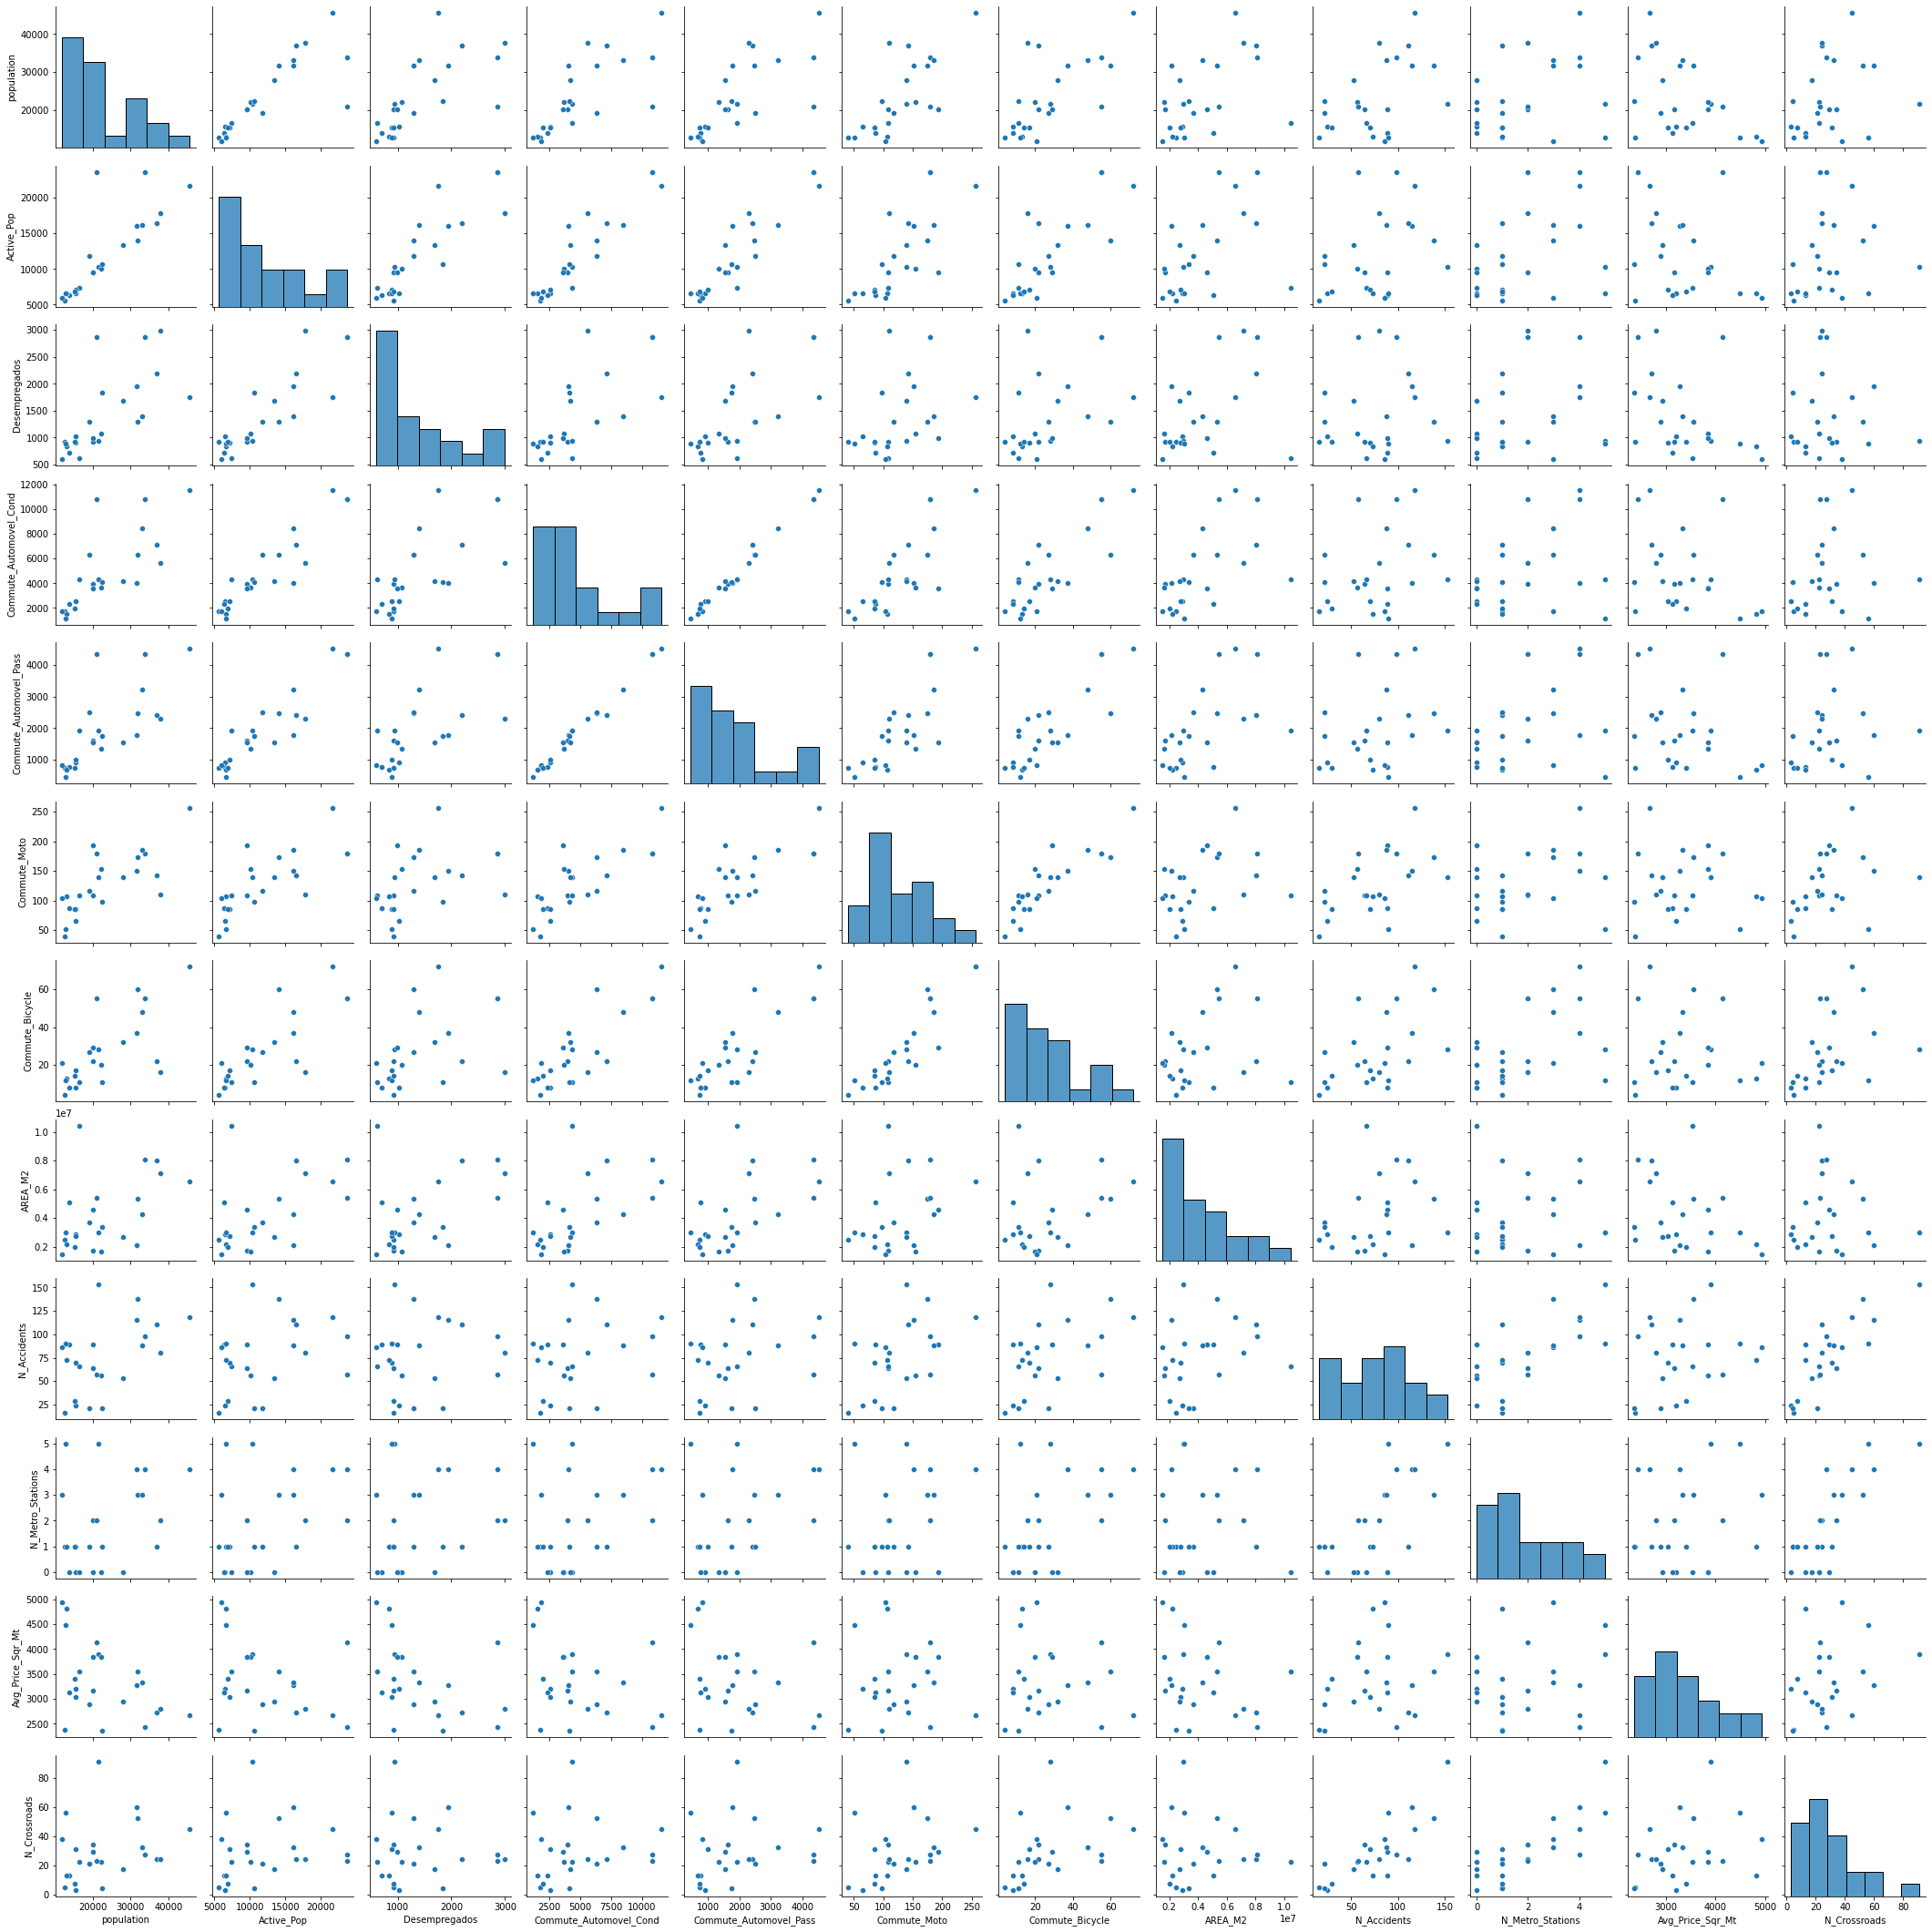

In [195]:
df_subset = dfModel[dfModel.columns].copy()
sns.pairplot(df_subset)

### 5.2.3. Check the spearman correlation between variables

<AxesSubplot:>

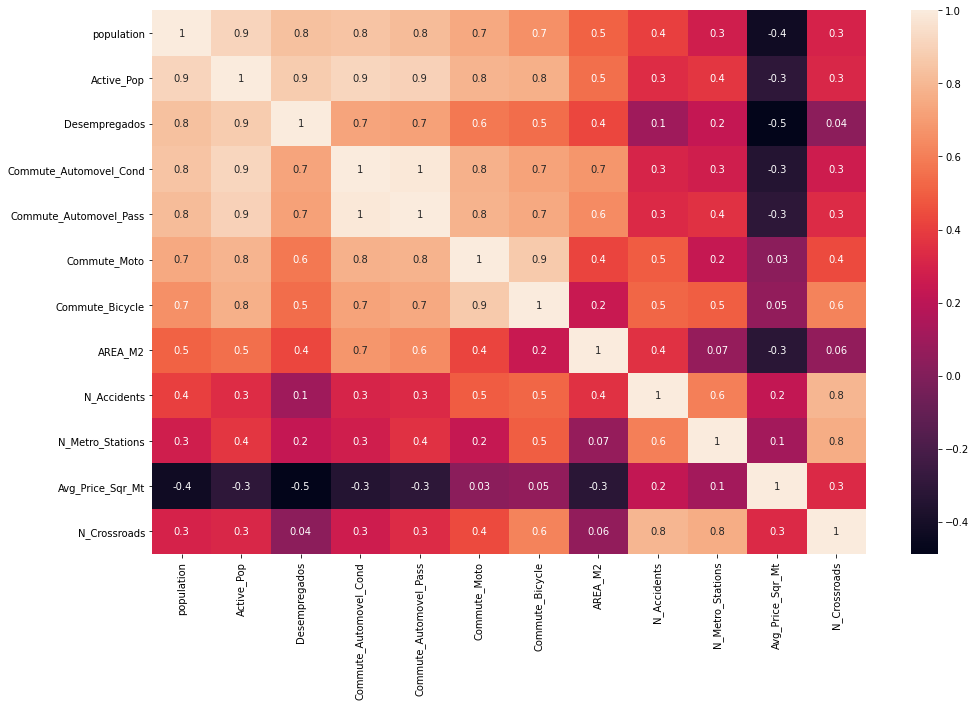

In [196]:
df_corr = dfModel.corr(method='spearman')
figure = plt.figure(figsize=(16,10))
sns.heatmap(df_corr, annot=True, fmt = '.1g')

In [197]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr(method='spearman').abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(dfModel, 8))

Top Absolute Correlations
Commute_Automovel_Cond  Commute_Automovel_Pass    0.985425
Active_Pop              Commute_Automovel_Cond    0.913006
population              Active_Pop                0.909763
Active_Pop              Commute_Automovel_Pass    0.897542
                        Desempregados             0.873858
Commute_Moto            Commute_Bicycle           0.871572
population              Commute_Automovel_Cond    0.846271
                        Desempregados             0.834094
dtype: float64


Given the strong correlation several variables will be dropped.

In [198]:
dfModel.drop(columns=["Commute_Automovel_Cond", "Active_Pop", "Commute_Bicycle", "Desempregados", "population"], inplace=True)

In [199]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(dfModel, 8))

Top Absolute Correlations
N_Accidents             N_Crossroads        0.794995
Commute_Automovel_Pass  Commute_Moto        0.781114
N_Metro_Stations        N_Crossroads        0.759373
Commute_Automovel_Pass  AREA_M2             0.641583
N_Accidents             N_Metro_Stations    0.600956
Commute_Moto            N_Accidents         0.491732
                        N_Crossroads        0.439608
                        AREA_M2             0.421488
dtype: float64


### 5.2.4. Check for outliers
Outliers will be validates using the zscore method.

In [200]:
z_score_column = 'zscore'

def zscore_compute(df, column):
    return (df[column] - df[column].mean())/df[column].std(ddof=0)

def zscore_count_rows_outlier_category(df, column, zscore_column = z_score_column):
    df[zscore_column] = zscore_compute(df, column)
    count = {
        'lower':len(df[df[zscore_column] < - 3]),
        'upper':len(df[df[zscore_column] > 3])
     }
    df.drop(columns=[zscore_column], inplace=True)
    return count

def zscore_categorize_outliers(df, column):
    print(f"Describe: {df[column].describe()}")
    count = zscore_count_rows_outlier_category(df,column)
    print(f"Number of rows affected. Lower: {count['lower']}, upper: {count['upper']}")
    print(f"Skewness: {df[column].skew()}")
    print(f"Kurtosis: {df[column].kurt()}")

def zscore_filter_outlier(df, column, zscore_column = z_score_column):
    dfz = df.copy()
    if zscore_column not in dfz.columns:
        dfz[zscore_column] = zscore_compute(dfz, column)
    return dfz.loc[(dfz[zscore_column] > - 3) & (dfz[zscore_column] < + 3)]

def show_var(df, column, bins=25):
    fig, axes = plt.subplots(2,1, figsize = (14,20))
    sns.boxplot(ax=axes[0], data=df, x=column)
    sns.histplot(ax=axes[1], data = df, x=column, bins=bins)

Describe: count      24.000000
mean     1907.000000
std      1198.339068
min       450.000000
25%       889.250000
50%      1681.000000
75%      2439.250000
max      4520.000000
Name: Commute_Automovel_Pass, dtype: float64
Number of rows affected. Lower: 0, upper: 0
Skewness: 1.0393934096300472
Kurtosis: 0.34541362073611115
Describe: count     24.000000
mean     127.541667
std       50.650533
min       40.000000
25%       95.250000
50%      113.500000
75%      159.000000
max      257.000000
Name: Commute_Moto, dtype: float64
Number of rows affected. Lower: 0, upper: 0
Skewness: 0.5186628972052673
Kurtosis: 0.3987259785880264
Describe: count    2.400000e+01
mean     4.168925e+06
std      2.399558e+06
min      1.494349e+06
25%      2.410881e+06
50%      3.183577e+06
75%      5.365094e+06
max      1.042695e+07
Name: AREA_M2, dtype: float64
Number of rows affected. Lower: 0, upper: 0
Skewness: 1.0771673054791562
Kurtosis: 0.5018407943333529
Describe: count     24.000000
mean      75.208333

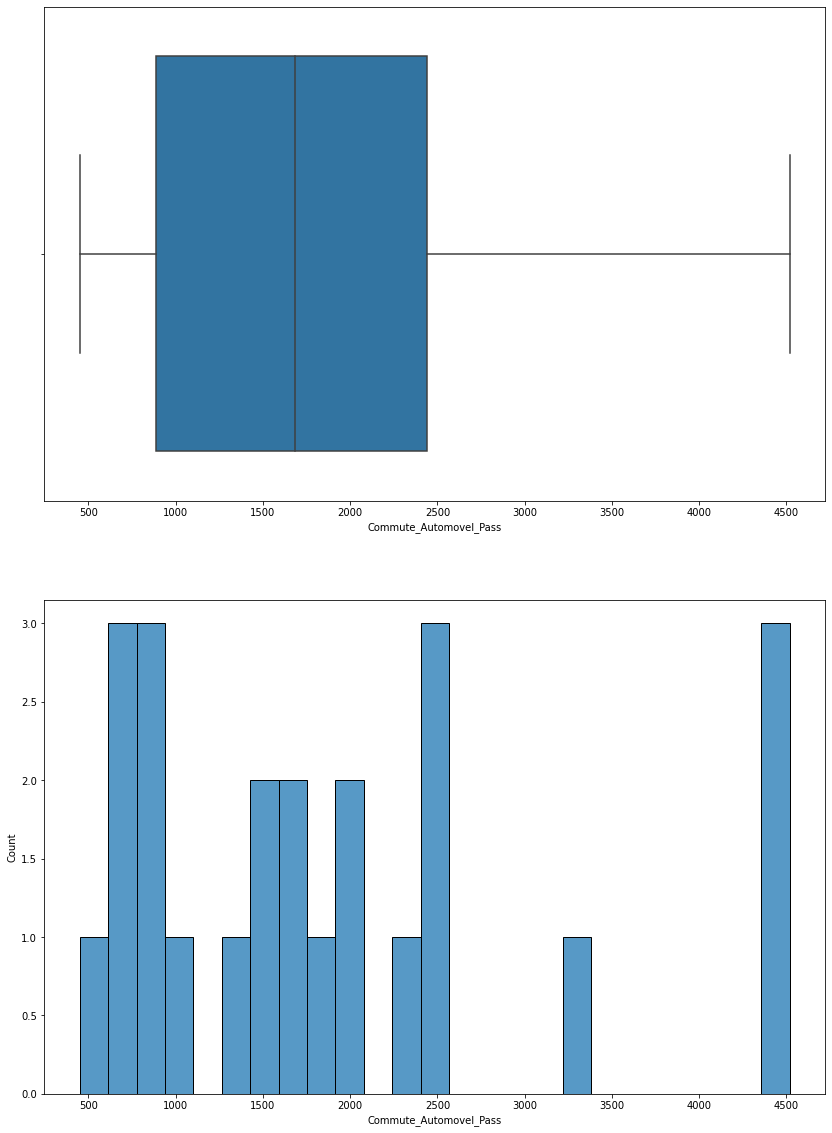

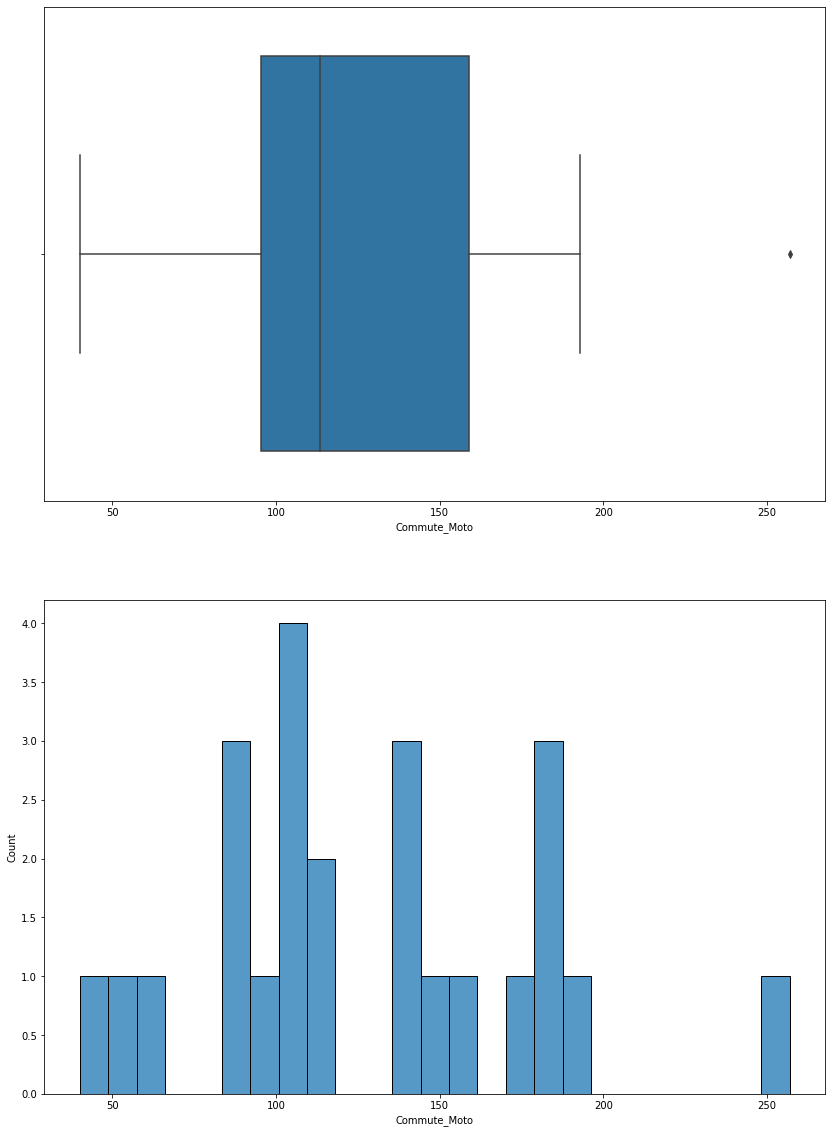

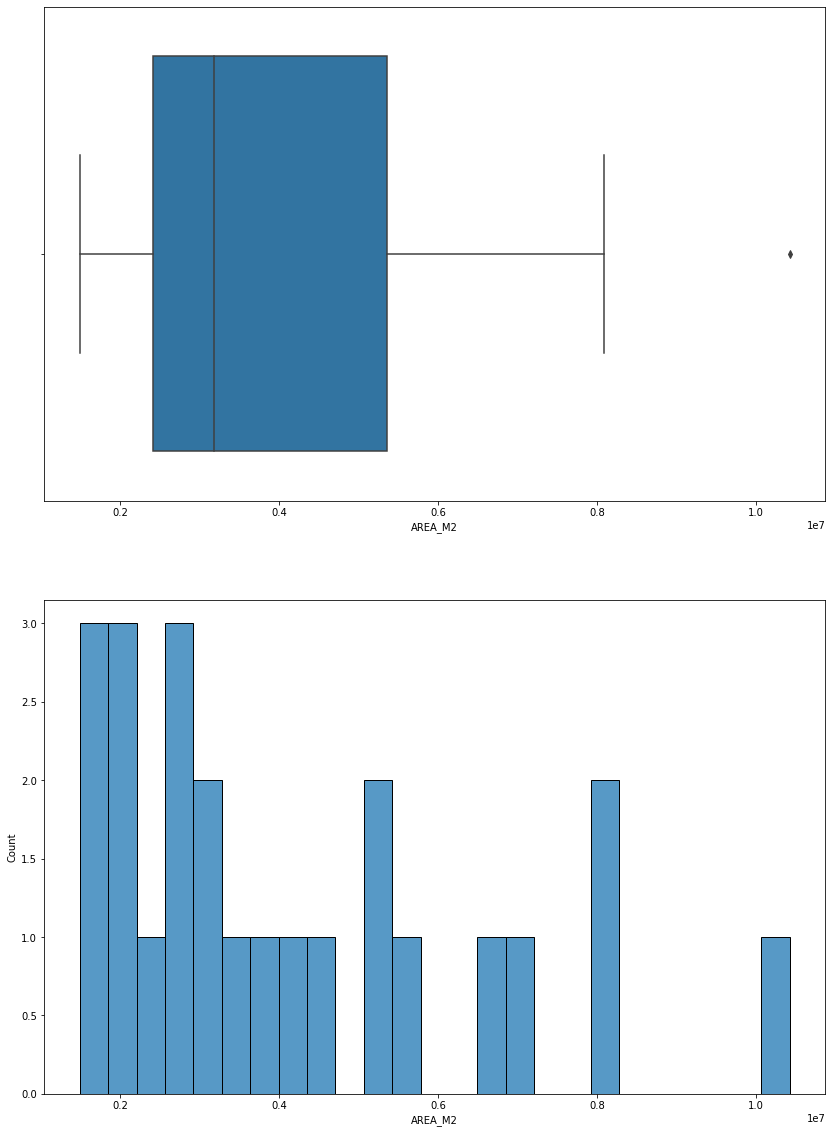

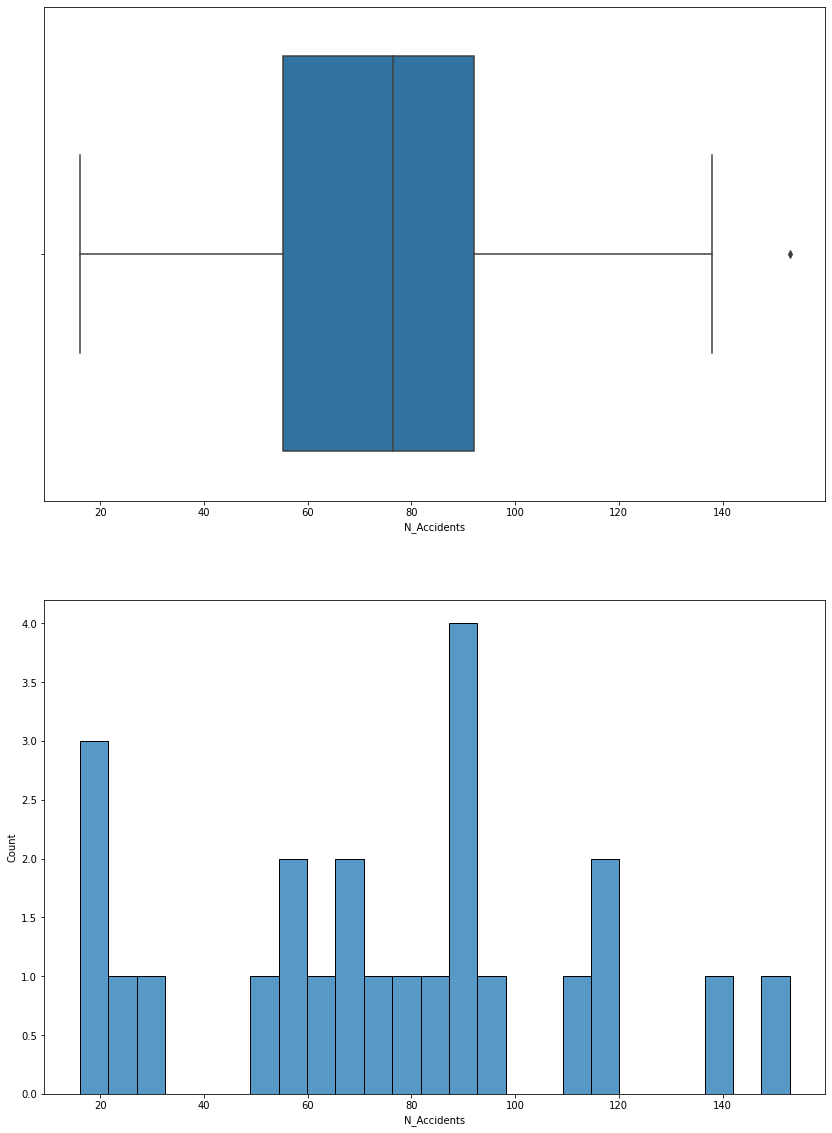

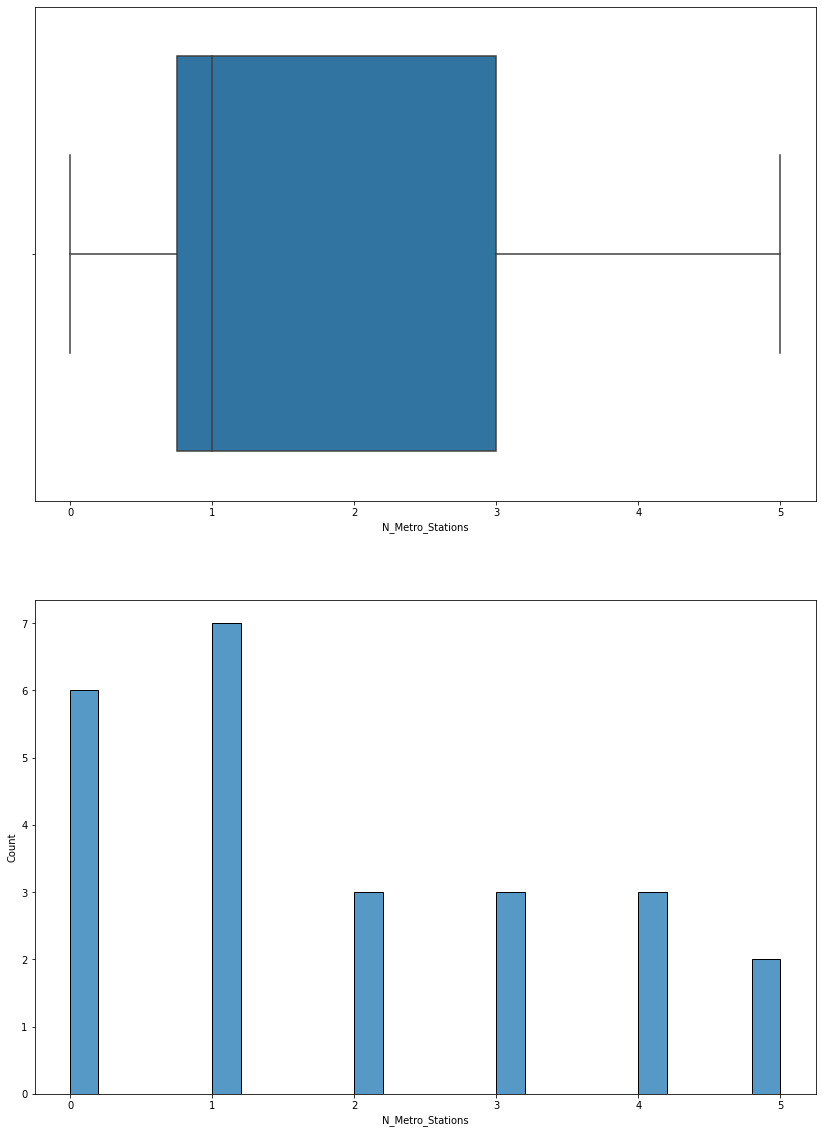

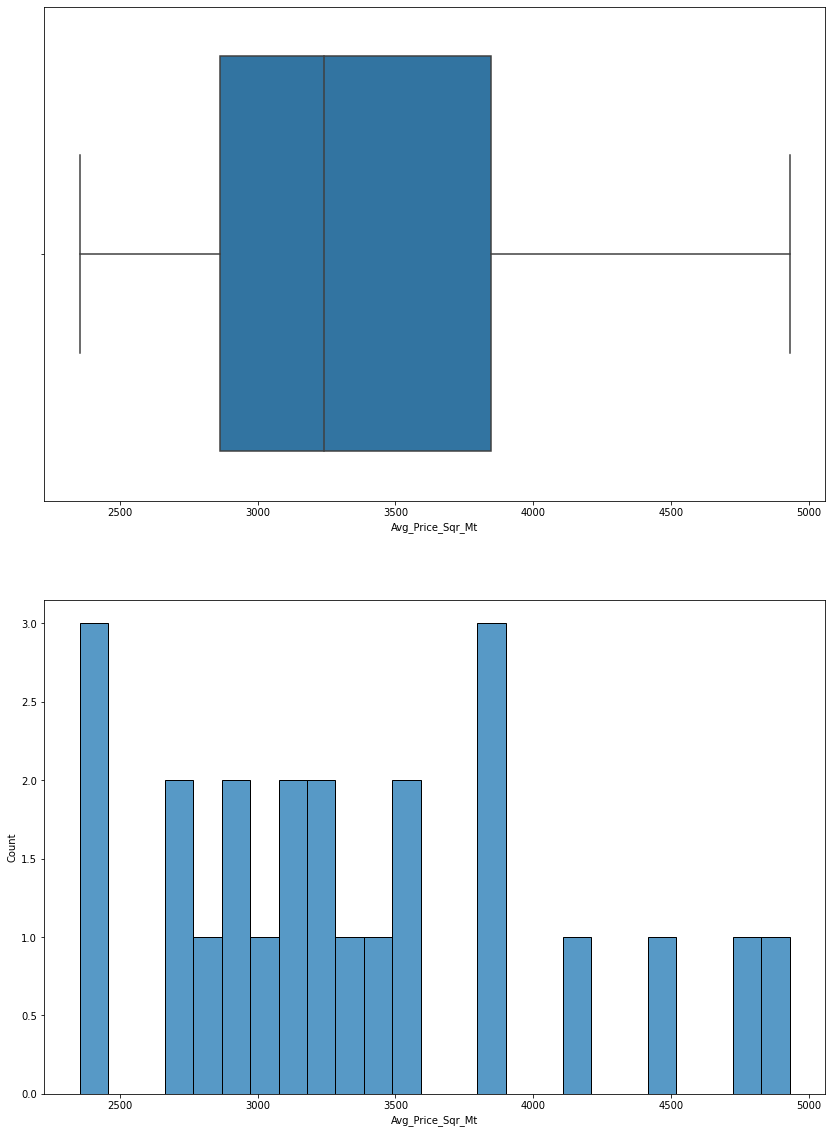

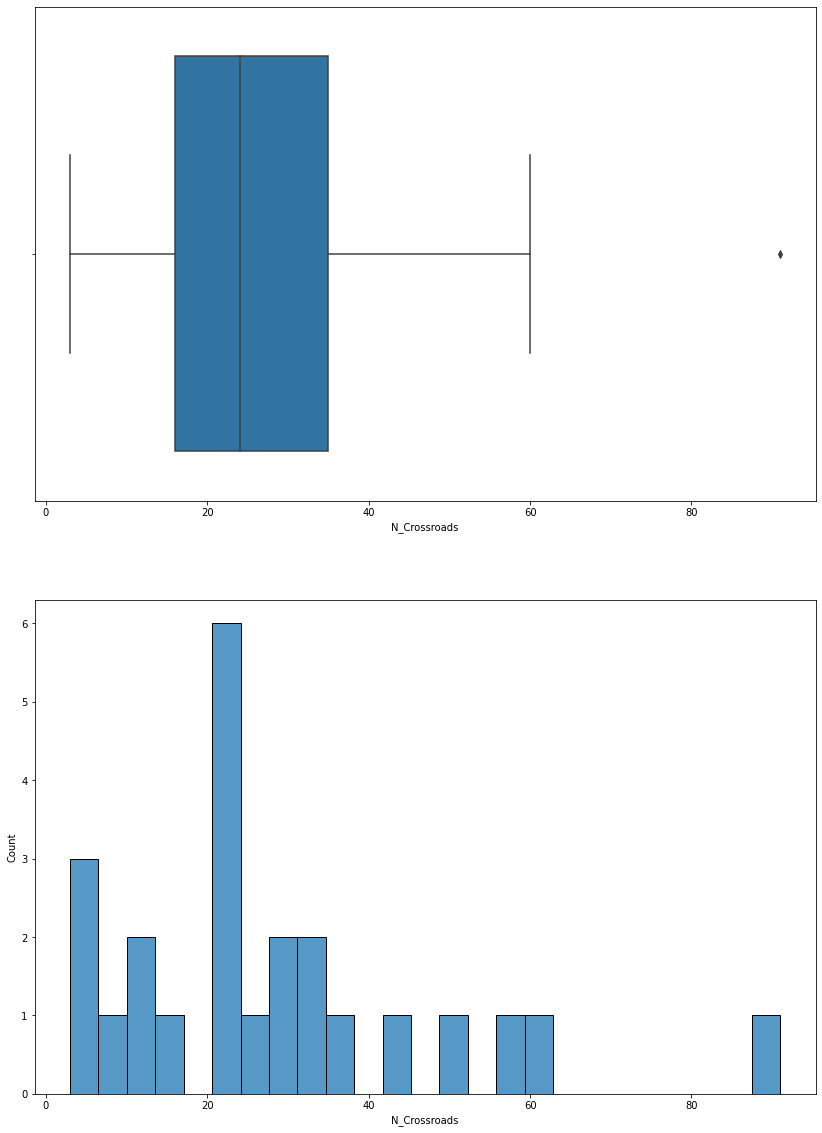

In [201]:
for currColumn in dfModel.columns:
# currColumn = 'N_Crossroads'
    show_var(dfModel, currColumn)
    zscore_categorize_outliers(dfModel, currColumn)

The data show not significant outliers, therefore no modifications were made.

<a id='scaling'></a>
## 5.3. Data Scaling

In [202]:
scaler = StandardScaler().fit(dfModel)
scaled_df = pd.DataFrame(scaler.transform(dfModel), columns=dfModel.columns)
cols = dfModel.columns
scaled_df = pd.DataFrame(scaled_df, columns = cols)

<a id='modeling'></a>
## 5.4. Modeling

### 5.4.1. Data split

In [203]:
target = scaled_df.loc[:,"N_Accidents"]
data = scaled_df.drop(columns=["N_Accidents"])

### 5.4.2. Feature selection

In [204]:
#no of features
nof_list=np.arange(1,len(data.columns))
high_score=0
#Variable to store the optimum features
nof=0
score_list =[]
for n in range(len(nof_list)):
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(data,target)
    X_val_rfe = rfe.transform(data)
    model.fit(X_train_rfe,target)

    score = model.score(X_val_rfe,target)
    score_list.append(score)

    if(score > high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))


Optimum number of features: 5
Score with 5 features: 0.870359


d:\dev\python\venvs\data\edsa python64\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
d:\dev\python\venvs\data\edsa python64\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
d:\dev\python\venvs\data\edsa python64\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
d:\dev\python\venvs\data\edsa python64\lib\site-packages\skle

### 5.4.3. Model execution

In [205]:
reg = LinearRegression()

rfe = RFE(estimator = model, n_features_to_select = nof)
X_rfe = rfe.fit_transform(X = data, y = target)
model.fit(X = X_rfe,y = target)

selected_features = pd.Series(rfe.support_, index = data.columns)
selectedData = data[selected_features[selected_features==True].index]

model = reg.fit(selectedData,target)
y_pred = model.predict(selectedData)

print(r2_score(target.values, y_pred)) # dá o mm que o OLS
print(mean_absolute_error(target.values, y_pred))
print(mean_squared_error(target.values, y_pred))

# Test the model features
selectedDataConst = sm.add_constant(selectedData)
smmodel = sm.OLS(endog=target,exog=selectedDataConst)
results = smmodel.fit()
print(results.summary())

0.8703592400692731
0.28269874339622736
0.1296407599307269
                            OLS Regression Results                            
Dep. Variable:            N_Accidents   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     24.17
Date:                Mon, 10 May 2021   Prob (F-statistic):           2.12e-07
Time:                        19:01:52   Log-Likelihood:                -9.5387
No. Observations:                  24   AIC:                             31.08
Df Residuals:                      18   BIC:                             38.15
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

<a id='model-results'></a>
## 5.5. Model results

In [206]:
resultScaled = scaled_df.copy()
resultScaled["N_Accidents"] = y_pred
dfResult = pd.DataFrame(scaler.inverse_transform(resultScaled), columns=resultScaled.columns)
dfResult.rename(columns={"N_Accidents": "N_Accidents_pred"}, inplace=True)
dfResult = dfResult.join(geoParishdata[["N_Accidents", "Freguesia", "geometry"]])

dfResult = gpd.GeoDataFrame(
    dfResult, geometry=dfResult['geometry'])

dfResult = dfResult[["Freguesia", "N_Accidents","N_Accidents_pred", "geometry"]]
dfResult['Residuals'] =  dfResult["N_Accidents"] - dfResult["N_Accidents_pred"]
dfResult

Freguesia  N_Accidents  N_Accidents_pred  \
0                     Ajuda           24         21.527226   
1                 Alcântara           89         59.333910   
2                  Alvalade          138        122.304764   
3                   Areeiro           64         59.754814   
4                   Arroios          115        117.045404   
5            Avenidas Novas          153        148.100692   
6                     Beato           16         19.124574   
7                     Belém           66         92.007647   
8                   Benfica          111         89.109547   
9          Campo de Ourique           56         62.482442   
10                Campolide           70         60.237763   
11                  Carnide           21         40.939065   
12                  Estrela           89        104.502966   
13                   Lumiar          118        128.715924   
14                  Marvila           80         76.698506   
15             Misericórdia           73         57.529784   
16                  Olivais           98         90.017998   
17        Parque das Nações           57         52.655088   
18          Penha de França           53         54.095134   
19              Santa Clara           21         31.270668   
20        Santa Maria Maior           90        108.141179   
21            Santo António           86         83.922103   
22  São Domingos de Benfica           88         86.540859   
23              São Vicente           29         38.941942   

                                             geometry  Residuals  
0   POLYGON ((-9.19303 38.71619, -9.19295 38.71368...   2.472774  
1   POLYGON ((-9.17812 38.72376, -9.17800 38.72373...  29.666090  
2   POLYGON ((-9.12857 38.76302, -9.12859 38.76279...  15.695236  
3   POLYGON ((-9.12374 38.73866, -9.12477 38.73829...   4.245186  
4   POLYGON ((-9.13306 38.73019, -9.13311 38.73008...  -2.045404  
5   POLYGON ((-9.14758 38.74494, -9.14752 38.74464...   4.899308  
6   POLYGON ((-9.12374 38.73866, -9.12323 38.73894...  -3.124574  
7   POLYGON ((-9.20591 38.71526, -9.20620 38.71482... -26.007647  
8   POLYGON ((-9.19402 38.75724, -9.19439 38.75657...  21.890453  
9   POLYGON ((-9.15764 38.72246, -9.15735 38.72230...  -6.482442  
10  POLYGON ((-9.16667 38.73939, -9.16642 38.73922...   9.762237  
11  POLYGON ((-9.17522 38.78027, -9.17522 38.78025... -19.939065  
12  POLYGON ((-9.16081 38.71555, -9.16075 38.71554... -15.502966  
13  POLYGON ((-9.16682 38.78379, -9.16624 38.78332... -10.715924  
14  POLYGON ((-9.12567 38.76252, -9.12532 38.76243...   3.301494  
15  POLYGON ((-9.14552 38.71556, -9.14510 38.71549...  15.470216  
16  POLYGON ((-9.13429 38.78492, -9.13393 38.78485...   7.982002  
17  POLYGON ((-9.09570 38.79676, -9.09569 38.79676...   4.344912  
18  POLYGON ((-9.12640 38.73774, -9.12602 38.73707...  -1.095134  
19  POLYGON ((-9.14846 38.79474, -9.14832 38.79471... -10.270668  
20  POLYGON ((-9.13504 38.71978, -9.13499 38.71978... -18.141179  
21  POLYGON ((-9.14492 38.72825, -9.14405 38.72731...   2.077897  
22  POLYGON ((-9.16970 38.75732, -9.16978 38.75707...   1.459141  
23  POLYGON ((-9.12715 38.72365, -9.12646 38.72317...  -9.941942

<a id='visual-results'></a>
## 5.6. Visual representation

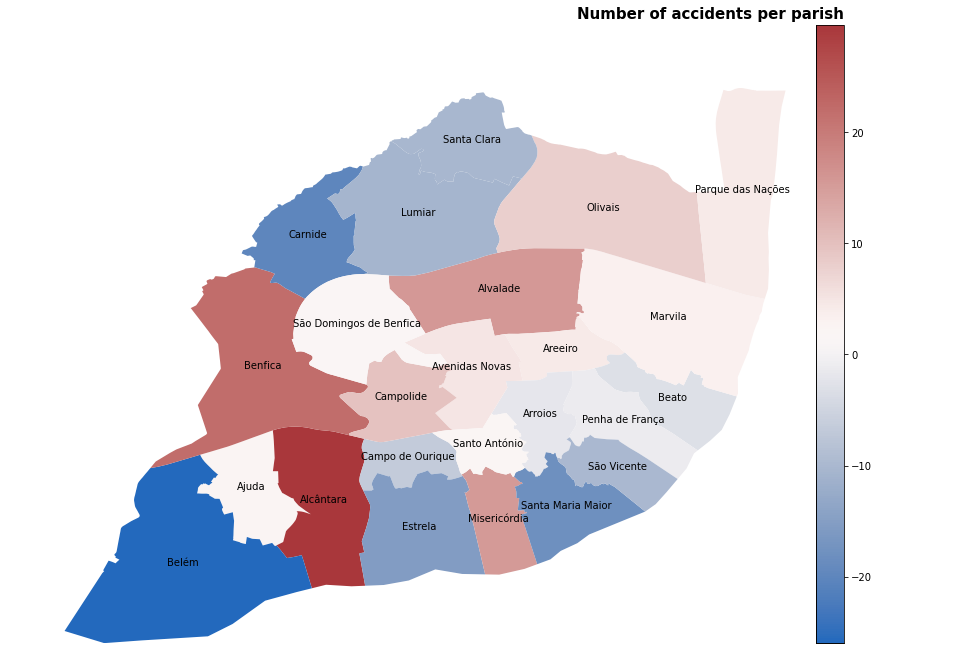

In [207]:
fig, ax = plt.subplots(figsize=(15,15))

ax.set_xlim(-9.25, -9.05)
ax.set_ylim(38.68, 38.81)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad="-15%")
dfResult.plot(column='Residuals', ax=ax, legend=True, cax=cax, cmap='vlag')

#remove axis
sns.despine(top=True,right=True)

#Title
plt.title('Number of accidents per parish',fontsize=15,fontweight='bold',loc='right')

dfResult.apply(lambda x: ax.annotate(text=x.Freguesia, xy=x.geometry.centroid.coords[0], ha='center'),axis=1);
ax.axis('off')
fig.savefig(r'charts\residuals.png', bbox_inches='tight')

[BACK TO TOC](#toc)
<a id='annex'></a>
# 6. Annexes

Hereinafter is the annex with the rejected analysis, executed prior to the the decision to change focus and analyse the
parishes endogenous factors

<a id='type-accident'></a>
## 6.1. Identify the principal characteristics that influence the type of accident

In [208]:
dfModel = dfAccidents.copy()

## 6.1.1. Drop columns

In [209]:
dfModel.columns

Index(['Datahora', 'Dia da Semana', 'Sentidos', 'Latitude GPS',
       'Longitude GPS', 'Via Trânsito', 'Localizações', 'Freguesia',
       'Pov. Proxima', 'Tipo Natureza', 'Natureza', 'Traçado 1', 'Traçado 2',
       'Traçado 3', 'Traçado 4', 'Estado Conservação',
       'Características Tecnicas', 'Reg Circulação', 'Marca Via', 'Obstáculos',
       'Sinais', 'Sinais Luminosos', 'Tipo Piso', 'Intersecção Vias',
       'Factores Atmosféricos', 'Luminosidade', 'Cond Aderência', 'VM', 'FG',
       'FL', 'Tipos Vias', 'Via', 'Num arruamento', 'Km', 'Nome arruamento',
       'Localização 2', 'n_vehic', 'n_pawns', 'n_passg', 'people', 'geometry',
       'Date_aux', 'Time_aux', 'Month', 'Year', 'Day', 'hour', 'part_of_day'],
      dtype='object')

In [210]:
dfModel = dfModel.drop(columns=[
    'Datahora',
    'Dia da Semana',
    'Latitude GPS',
    'Longitude GPS',
    'Localizações',
    'Pov. Proxima',
    'Freguesia',
    'Num arruamento',
    'VM',
    'FG',
    'FL',
    'Via',
    'Km',
    'Nome arruamento',
    'Localização 2',
    'geometry',
    'Date_aux',
    'Time_aux',
    'Month',
    'Year',
    'Day',
    'hour',
    'n_vehic',
    'n_pawns',
    'n_passg',
    'people',
    'Natureza',
])

## 6.1.2. Dummy variables

In [211]:
df_dummies = pd.get_dummies(dfModel, drop_first = True)
df_dummies

Sentidos_No sentido decrescente da quilometragem  \
IdAcidente                                                      
20191648491                                                 0   
20191648498                                                 0   
20191648520                                                 0   
20191649633                                                 0   
20191649654                                                 0   
...                                                       ...   
20201827869                                                 0   
20201828362                                                 0   
20201831029                                                 0   
20201838659                                                 0   
20201866679                                                 0   

             Sentidos_NÃO DEFINIDO  Via Trânsito_Direita  \
IdAcidente                                                 
20191648491                      1                     1   
20191648498                      1                     0   
20191648520                      1                     0   
20191649633                      1                     1   
20191649654                      1                     1   
...                            ...                   ...   
20201827869                      1                     1   
20201828362                      0                     0   
20201831029                      1                     1   
20201838659                      1                     1   
20201866679                      1                     1   

             Via Trânsito_Esquerda  Tipo Natureza_Colisão  \
IdAcidente                                                  
20191648491                      0                      0   
20191648498                      1                      0   
20191648520                      0                      1   
20191649633                      0                      0   
20191649654                      0                      1   
...                            ...                    ...   
20201827869                      0                      0   
20201828362                      0                      1   
20201831029                      0                      1   
20201838659                      0                      0   
20201866679                      0                      1   

             Tipo Natureza_Despiste  Traçado 1_NÃO DEFINIDO  Traçado 1_Recta  \
IdAcidente                                                                     
20191648491                       0                       0                1   
20191648498                       0                       0                1   
20191648520                       0                       0                1   
20191649633                       0                       0                1   
20191649654                       0                       0                1   
...                             ...                     ...              ...   
20201827869                       0                       0                1   
20201828362                       0                       0                0   
20201831029                       0                       0                1   
20201838659                       0                       0                0   
20201866679                       0                       0                1   

             Traçado 2_Em Lomba  Traçado 2_Em patamar  ...  \
IdAcidente                                             ...   
20191648491                   0                     1  ...   
20191648498                   0                     1  ...   
20191648520                   0                     0  ...   
20191649633                   0                     1  ...   
20191649654                   0                     0  ...   
...                         ...                   ...  ...   
20201827869                   0                     1  

No columns with null values

In [212]:
df_dummies.columns[df_dummies.isnull().any()]

Index([], dtype='object')

## 6.1.3 Linear Regression
Here we are trying to understand the exogenous factores for "Tipo Natureza". Therefore the goal is to try to
differentiate and identify the factors that affect each "Tipo Natureza". The "Tipo Natureza" considered will be
'collision', 'run over' and 'overturn'.

### Check Correlation

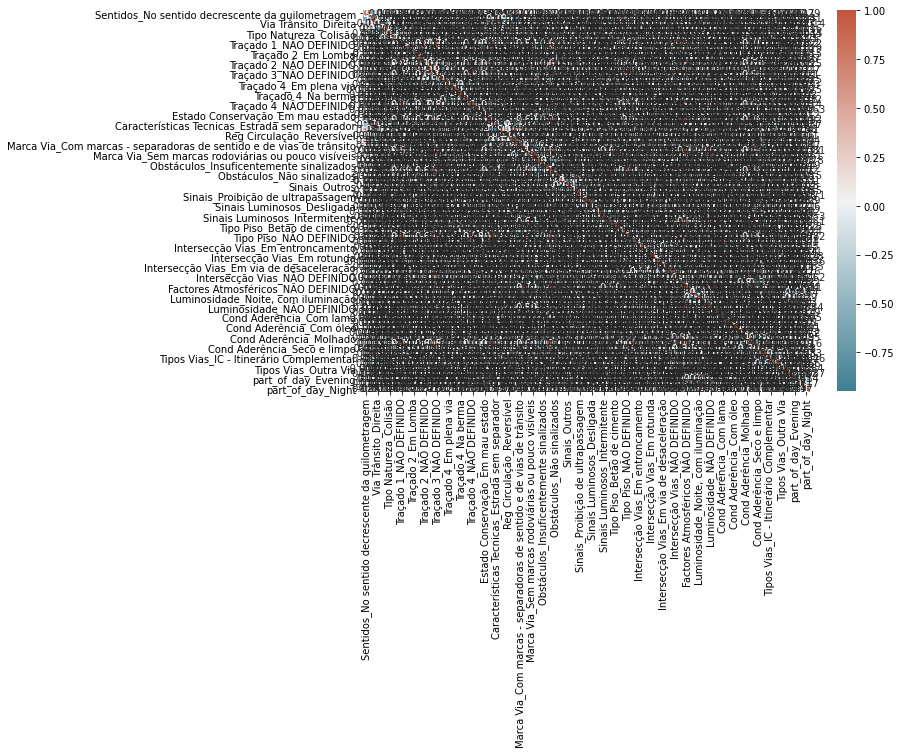

In [213]:
corr = df_dummies.corr()
plt.figure(figsize=(10,7))
cmp = sns.diverging_palette(220,20,as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmp)
plt.show()

The amount of dummy variables renders the correlation matrix unusable.
Alternatively, the top correlations were obtained and filtered if above 0.8.

In [214]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr(method='spearman').abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df_dummies, 10))

Top Absolute Correlations
Traçado 3_Berma pavimentada                     Traçado 3_Sem berma ou impraticável               0.947325
Características Tecnicas_Estrada sem separador  Características Tecnicas_Outra via                0.927855
Traçado 1_NÃO DEFINIDO                          Traçado 2_NÃO DEFINIDO                            0.888947
Cond Aderência_Molhado                          Cond Aderência_Seco e limpo                       0.885896
Factores Atmosféricos_Chuva                     Cond Aderência_Molhado                            0.875774
Luminosidade_Em pleno dia                       Luminosidade_Noite, com iluminação                0.873348
Factores Atmosféricos_Chuva                     Cond Aderência_Seco e limpo                       0.823244
Traçado 3_NÃO DEFINIDO                          Traçado 4_NÃO DEFINIDO                            0.811940
Estado Conservação_NÃO DEFINIDO                 Tipo Piso_NÃO DEFINIDO                            0.804120
Sentidos_NÃ

Drop the highly correlated features (above 0,8)

In [215]:
df_corr = df_dummies.copy()

corrCols = ['Traçado 3_Sem berma ou impraticável', 'Características Tecnicas_Outra via', 'Traçado 2_NÃO DEFINIDO',
            'Luminosidade_Noite, com iluminação', 'Cond Aderência_Seco e limpo', 'Cond Aderência_Molhado',
            'Cond Aderência_Seco e limpo', 'Cond Aderência_NÃO DEFINIDO', 'Traçado 4_NÃO DEFINIDO','Cond Aderência_NÃO DEFINIDO',
            'Estado Conservação_NÃO DEFINIDO'   ]

df_reg = df_corr.drop(columns=corrCols)

### Linear Regression

In [216]:
# Add the missing Tipo Natureza that was removed due to the dummy variables
df_reg['Tipo Natureza_Atropelamento'] = np.where(df_reg['Tipo Natureza_Colisão'] + df_reg['Tipo Natureza_Despiste'] == 0, 1, 0)

In [217]:
def runLinearReg(type, df, size=0.2, random=42):
    cols = ['Tipo Natureza_Atropelamento','Tipo Natureza_Colisão', 'Tipo Natureza_Despiste']
    column = 'Tipo Natureza_'+type
    y = df[column]
    df = df.drop(columns=cols)
    X =  df
    return train_test_split(X, y, test_size=size, random_state=random)

#### Collision

In [218]:
dependent = 'Colisão'

X_train, X_test, y_train, y_test = runLinearReg(dependent, df_reg)

feature_names = X_train.columns

reg = LinearRegression()

sfs = SequentialFeatureSelector(reg, n_features_to_select=10, direction='backward')
sfs.fit(X_train, y_train)

X_train_sel = X_train[feature_names[sfs.get_support()].tolist()]

# Train the Model
model = reg.fit(X_train_sel,y_train)

#X_test
X_test = X_test[feature_names[sfs.get_support()].tolist()]
# X_test = sm.add_constant(X_test)

y_pred = model.predict(X_test)

print(r2_score(y_test.values, y_pred)) # dá o mm que o OLS
print(mean_absolute_error(y_test.values, y_pred))
print(mean_squared_error(y_test.values, y_pred))

0.16121136102945277
0.40568432583828373
0.20532442641380133


Get more information on the model

In [219]:
# Test the model features
X_train_sel = sm.add_constant(X_train_sel)
model = sm.OLS(endog=y_train,exog=X_train_sel)
results = model.fit()
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     Tipo Natureza_Colisão   R-squared:                       0.186
Model:                               OLS   Adj. R-squared:                  0.182
Method:                    Least Squares   F-statistic:                     50.18
Date:                   Mon, 10 May 2021   Prob (F-statistic):           5.00e-91
Time:                           19:02:53   Log-Likelihood:                -1359.5
No. Observations:                   2214   AIC:                             2741.
Df Residuals:                       2203   BIC:                             2804.
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

#### Runover

In [220]:
dependent = 'Atropelamento'
X_train, X_test, y_train, y_test = runLinearReg(dependent, df_reg)

feature_names = X_train.columns

reg = LinearRegression()

sfs = SequentialFeatureSelector(reg, n_features_to_select=16, direction='backward')
sfs.fit(X_train, y_train)

X_train_sel = X_train[feature_names[sfs.get_support()].tolist()]

# Train the Model
model = reg.fit(X_train_sel,y_train)

#X_test
X_test = X_test[feature_names[sfs.get_support()].tolist()]
# X_test = sm.add_constant(X_test)

y_pred = model.predict(X_test)

print(r2_score(y_test.values, y_pred)) # dá o mm que o OLS
print(mean_absolute_error(y_test.values, y_pred))
print(mean_squared_error(y_test.values, y_pred))

0.2827063884825175
0.27289721825136015
0.13481565633719317


Get more information on the model

In [221]:
# Test the model features
X_train_sel = sm.add_constant(X_train_sel)
model = sm.OLS(endog=y_train,exog=X_train_sel)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:     Tipo Natureza_Atropelamento   R-squared:                       0.284
Model:                                     OLS   Adj. R-squared:                  0.279
Method:                          Least Squares   F-statistic:                     54.57
Date:                         Mon, 10 May 2021   Prob (F-statistic):          1.37e-146
Time:                                 19:03:41   Log-Likelihood:                -892.63
No. Observations:                         2214   AIC:                             1819.
Df Residuals:                             2197   BIC:                             1916.
Df Model:                                   16                                         
Covariance Type:                     nonrobust                                         
                                                                          coef    std err          t      P>|t|      [0.

#### Overturn

In [ ]:
dependent = 'Despiste'

X_train, X_test, y_train, y_test = runLinearReg(dependent, df_reg)

feature_names = X_train.columns

reg = LinearRegression()

sfs = SequentialFeatureSelector(reg, n_features_to_select=16, direction='backward')
sfs.fit(X_train, y_train)

X_train_sel = X_train[feature_names[sfs.get_support()].tolist()]

# Train the Model
model = reg.fit(X_train_sel,y_train)

#X_test
X_test = X_test[feature_names[sfs.get_support()].tolist()]
# X_test = sm.add_constant(X_test)

y_pred = model.predict(X_test)

print(r2_score(y_test.values, y_pred)) # dá o mm que o OLS
print(mean_absolute_error(y_test.values, y_pred))
print(mean_squared_error(y_test.values, y_pred))

Get more information on the model

In [ ]:
# Test the model features
X_train_sel = sm.add_constant(X_train_sel)
model = sm.OLS(endog=y_train,exog=X_train_sel)
results = model.fit()
print(results.summary())